https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview


# 數據分析

## Setting

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from itertools import product

In [ ]:
myfont = FontProperties(fname=r'/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/TaipeiSansTCBeta-Regular.ttf')

## Read

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/sales_train.csv')

In [ ]:
df_itemCategory = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/items.csv')

In [ ]:
df['date'] = [datetime.strptime(date_str, "%d.%m.%Y") for date_str in df['date'].values]

In [ ]:
item_cate = {}
for i in df_itemCategory.index:
    # print(df_itemCategory['item_id'][i], df_itemCategory['item_category_id'][i])
    item_cate[df_itemCategory['item_id'][i]] = df_itemCategory['item_category_id'][i]
df['item_category_id'] = [item_cate[item_id] for item_id in df['item_id']]

In [ ]:
pd.set_option('max_columns', None)
print(df)
print(df.keys())

              date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3              

In [ ]:
month_cnt = np.unique(df['date_block_num']).shape[0]
shop_cnt = np.unique(df['shop_id']).shape[0]
cate_cnt = np.unique(df['item_category_id']).shape[0]
item_cnt = np.unique(df_itemCategory['item_id']).shape[0]

print('month_cnt -> ', month_cnt)
print('shop_cnt -> ', shop_cnt)
print('cate_cnt -> ', cate_cnt)
print('item_cnt -> ', item_cnt)

month_cnt ->  34
shop_cnt ->  60
cate_cnt ->  84
item_cnt ->  22170


## 營業額 / 月

In [ ]:
d = np.zeros([month_cnt])

In [ ]:
total_price = df['item_price'] * df['item_cnt_day']
block_num = df['date_block_num']

In [ ]:
for i in range(34):
    d[i] = np.sum(total_price[block_num == i])

In [ ]:
dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]

Text(0.5, 1.0, '每月營業額')

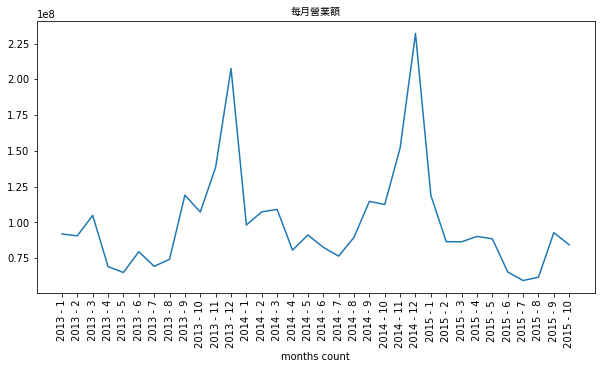

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(d)
plt.xticks(ticks=range(34), labels=label, rotation=90)
plt.xlabel('months count')
plt.title('每月營業額', fontproperties=myfont)

## 各類別銷量 / 月

In [ ]:
d_month_cate = np.zeros([month_cnt,cate_cnt])

In [ ]:
item_category_id = df['item_category_id']
block_num = df['date_block_num']
sale_count = df['item_cnt_day']
for i in df.index:
    d_month_cate[block_num[i], item_category_id[i]] += sale_count[i]

In [ ]:
def get_month_item_cnt(item):
    block_num = df['date_block_num']
    sale_count = df['item_cnt_day']
    item_ids = df['item_id']
    
    d_month_item = np.zeros([month_cnt,1])
    for month in range(month_cnt):
        d_month_item[month,:] = np.sum(sale_count[(block_num == month) & (item_ids == item)])
    return d_month_item.flatten()

In [ ]:
dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]

In [ ]:
for item_category in range(84):
    plt.figure(figsize=(25,4))

    plt.bar(range(34),d_month_cate[:, item_category])

    plt.xticks(ticks=range(34), labels=label, rotation=90)
    plt.xlabel('月份', fontproperties=myfont)
    plt.ylabel('數量', fontproperties=myfont)
    plt.title(f'類別 {item_category}', fontproperties=myfont)

    ####################################################################
    item_in_cate = df_itemCategory[df_itemCategory['item_category_id']==item_category]['item_id']
    fig,ax = plt.subplots(5,3,figsize=(25,30))
    for n,item in enumerate(item_in_cate):
        if n >= 15:
            break
        ax[n//3,n%3].bar(range(34),get_month_item_cnt(item)) 
        ax[n//3,n%3].set_xticklabels(label)
        ax[n//3,n%3].set_title(f'item {item}')


Output hidden; open in https://colab.research.google.com to view.

## 各分店銷售量 / 月

In [ ]:
d = np.zeros([month_cnt,shop_cnt])

In [ ]:
shop_id = df['shop_id']
total_price = df['item_cnt_day']
block_num = df['date_block_num']
for i in range(34):
    for j in range(shop_cnt):
        d[i,j] = np.sum(total_price[(block_num == i) & (shop_id == j)])

In [ ]:
dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

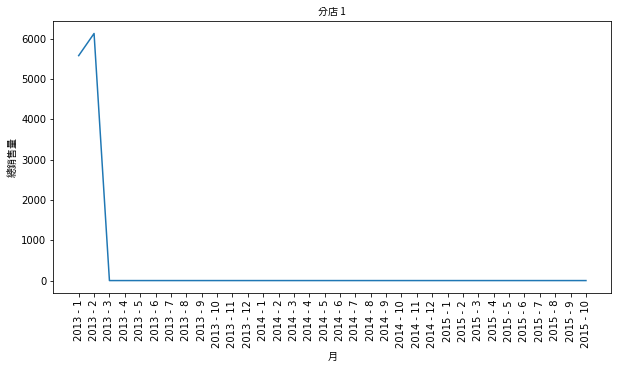

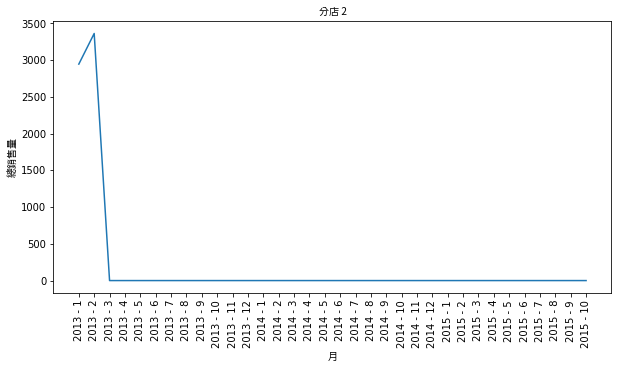

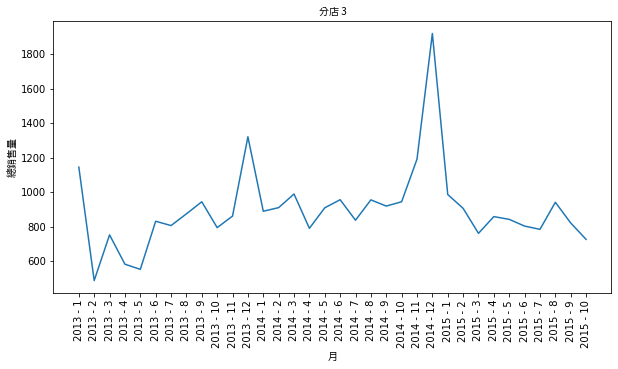

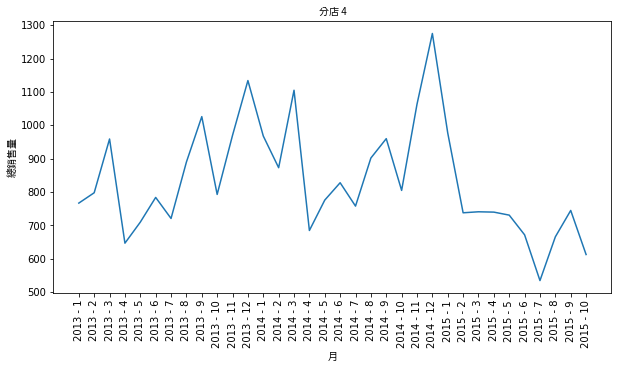

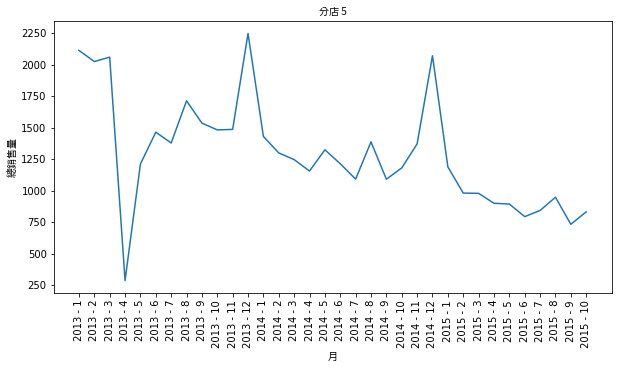

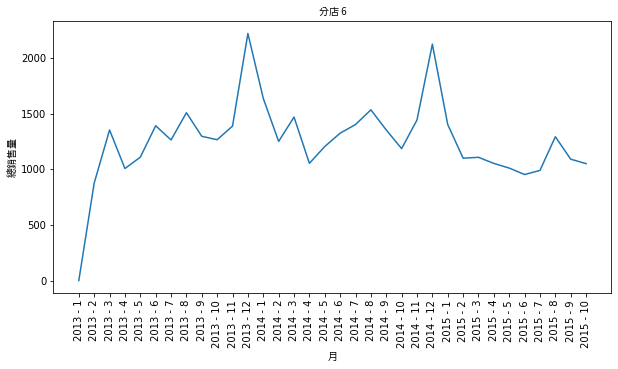

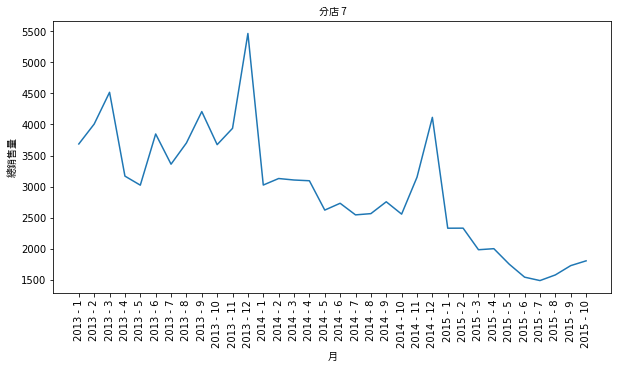

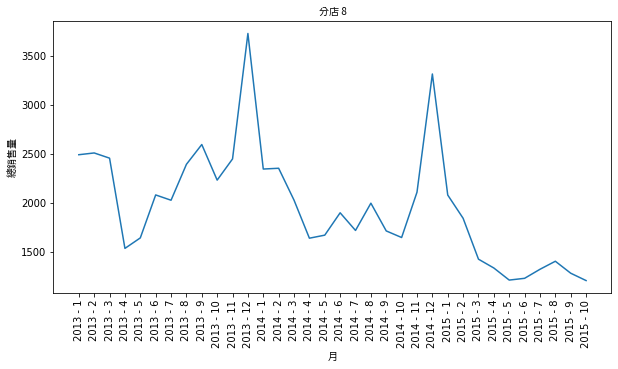

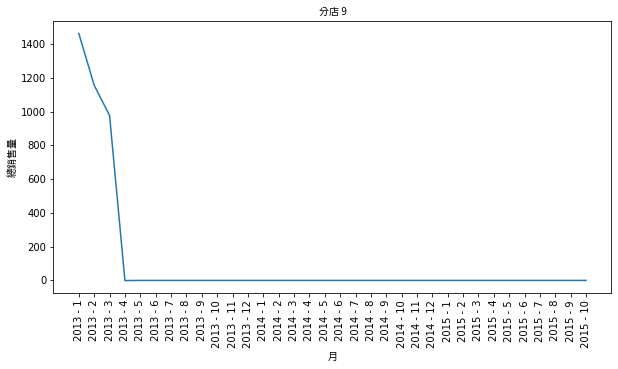

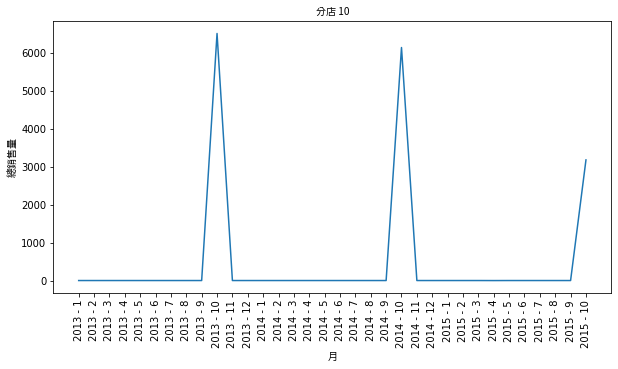

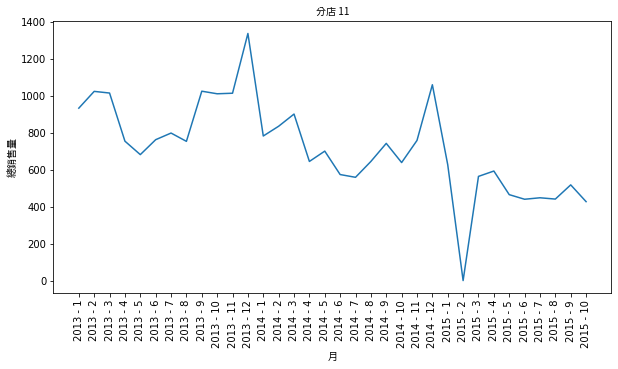

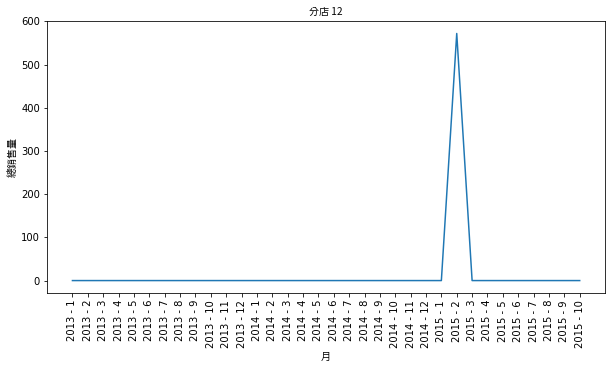

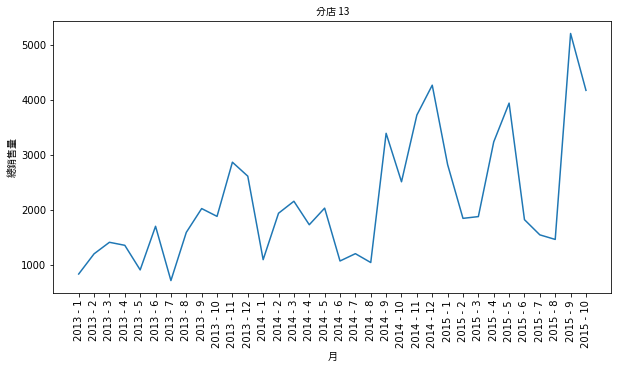

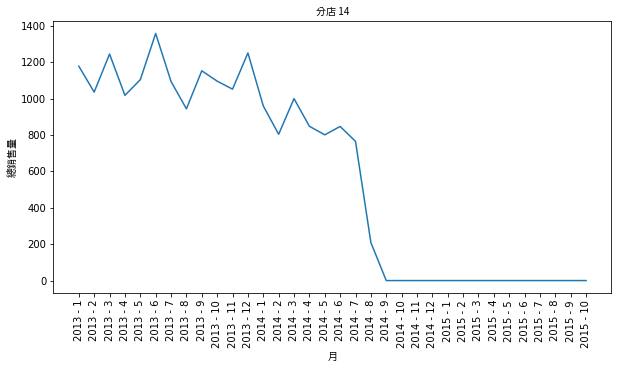

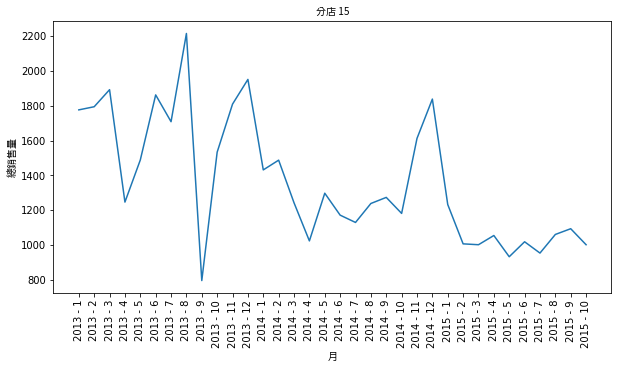

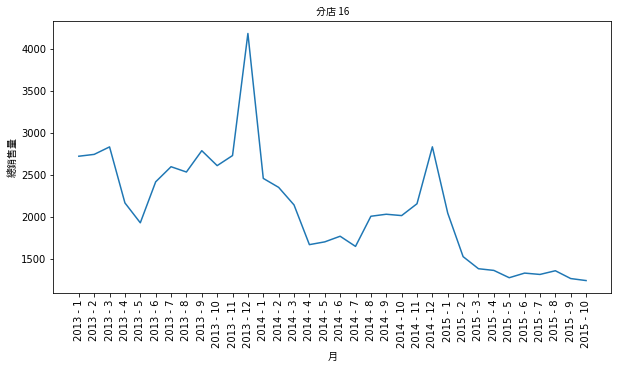

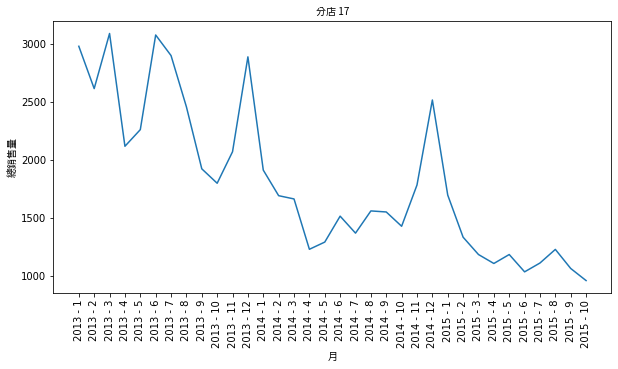

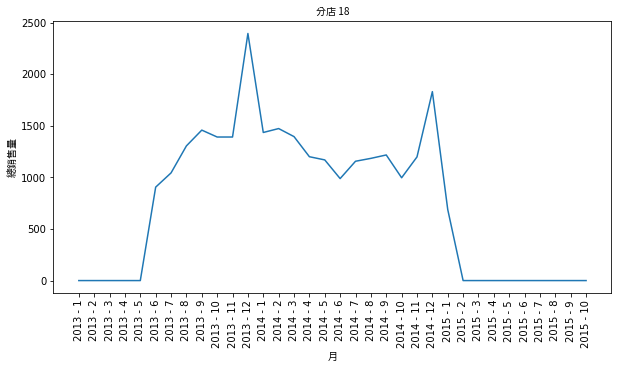

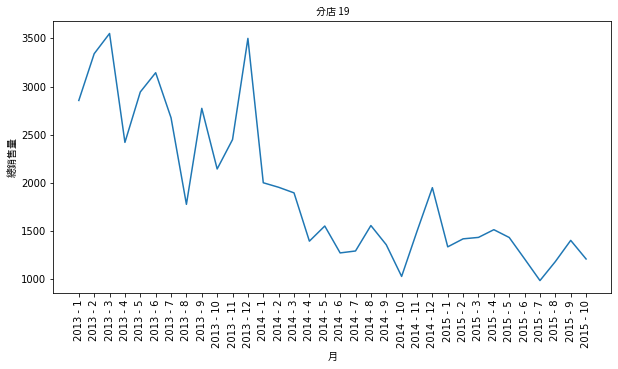

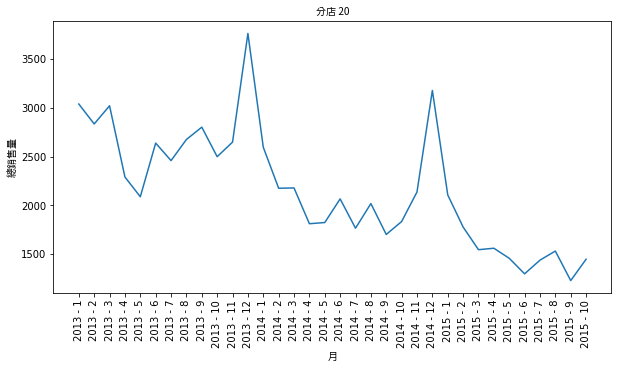

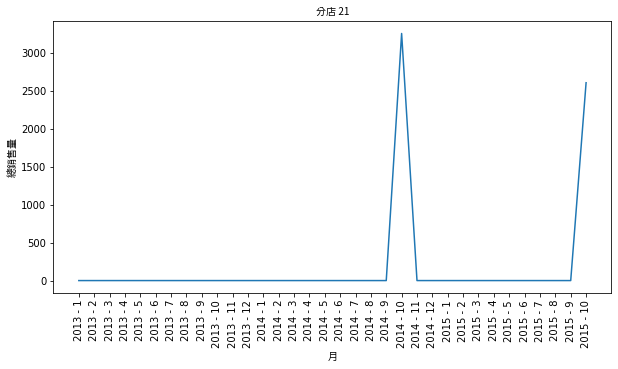

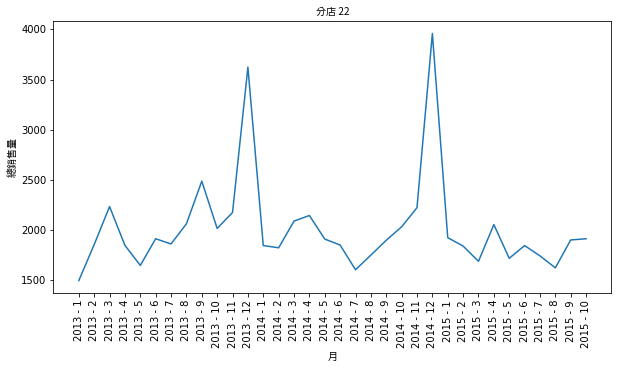

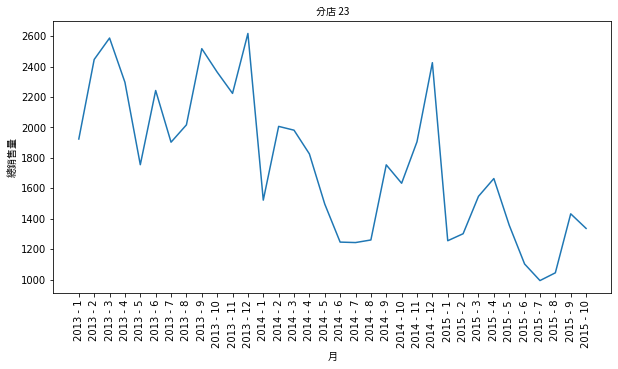

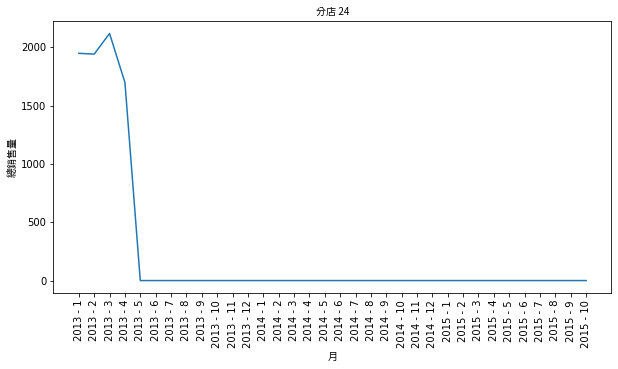

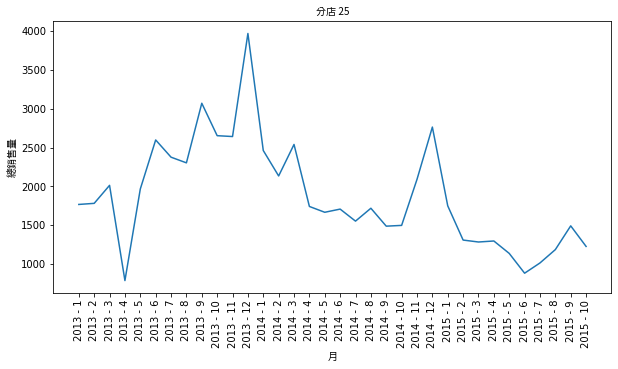

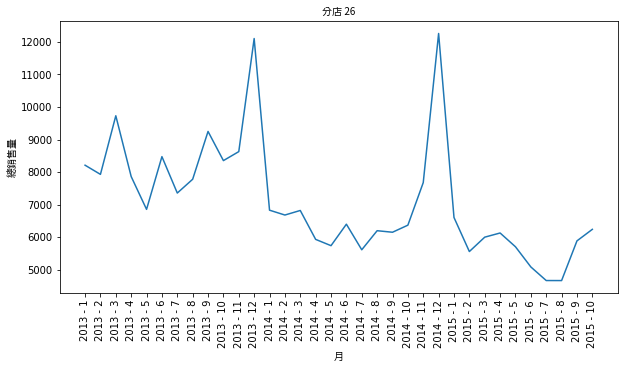

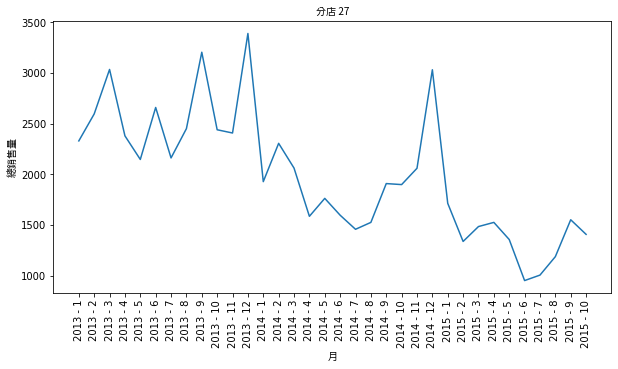

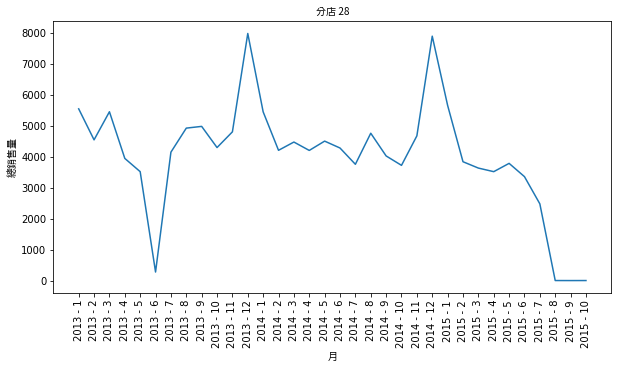

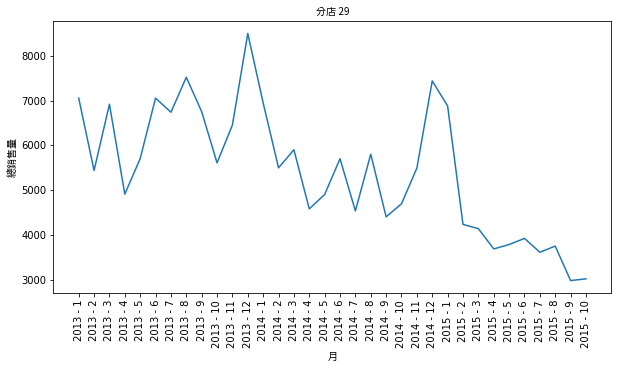

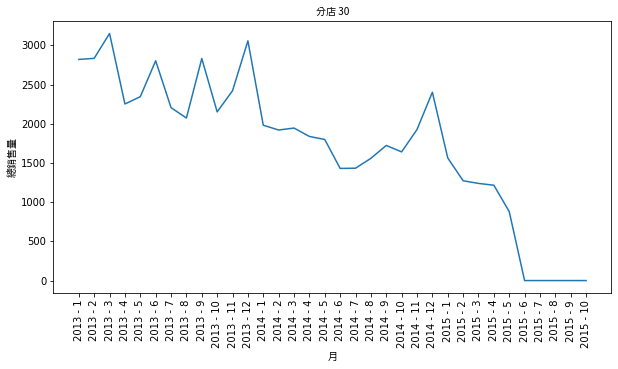

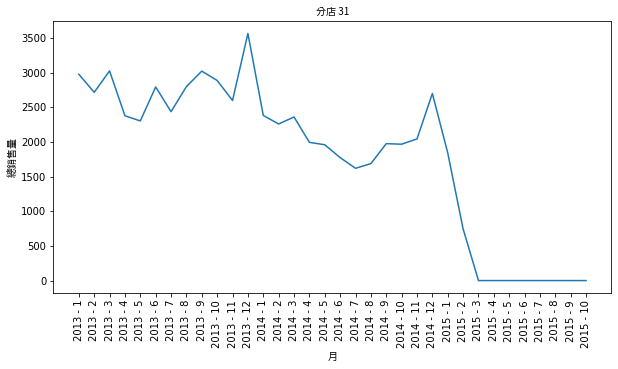

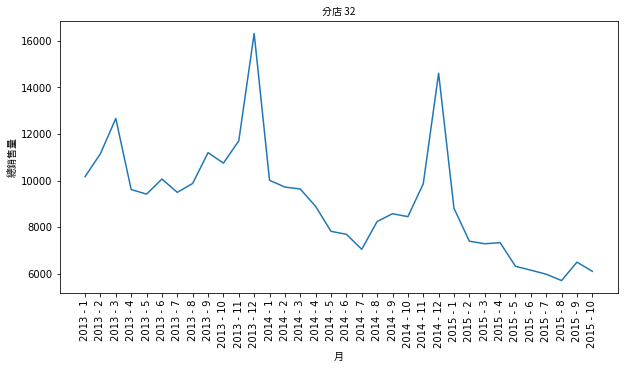

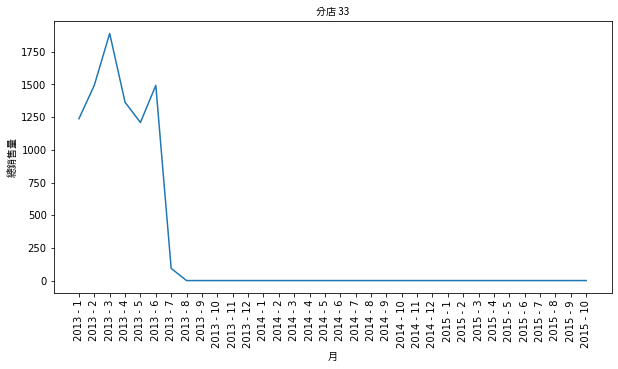

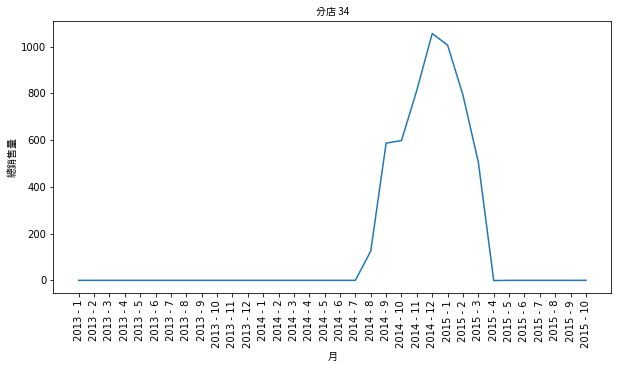

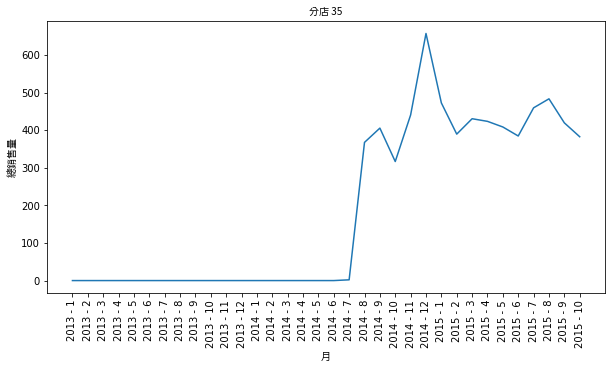

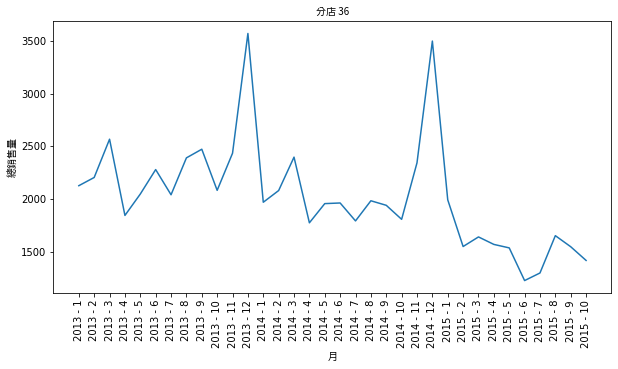

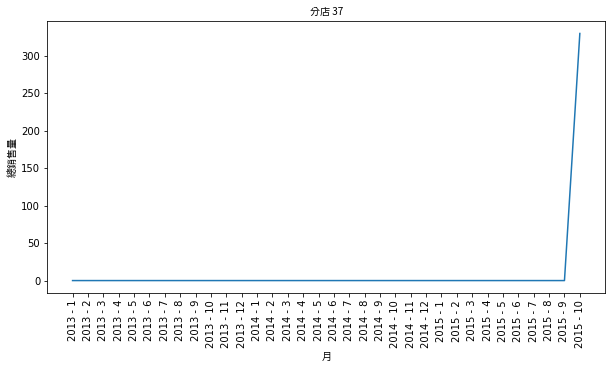

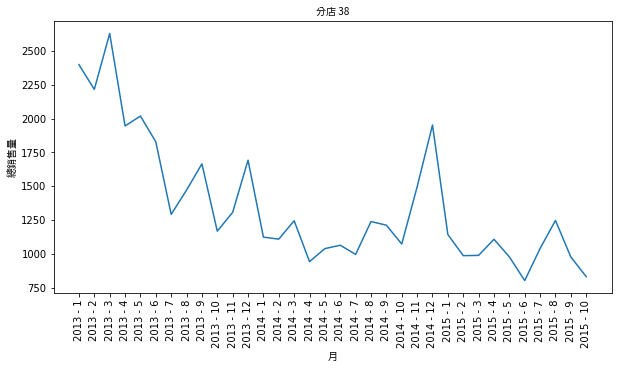

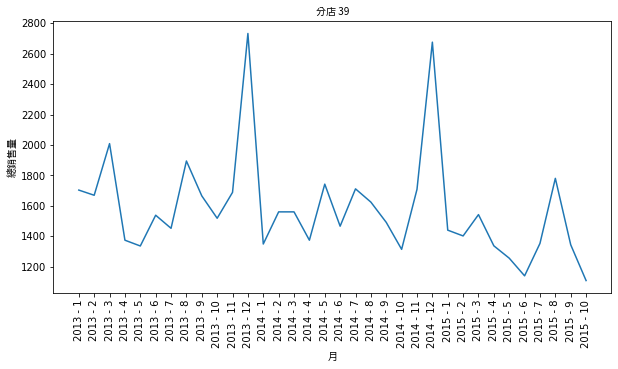

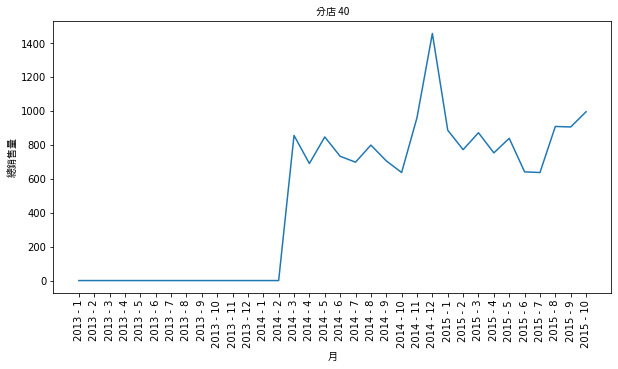

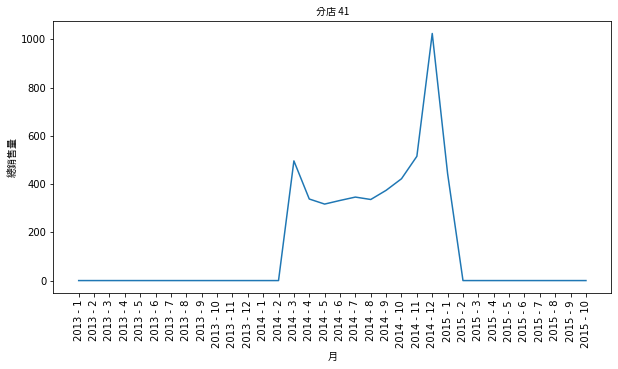

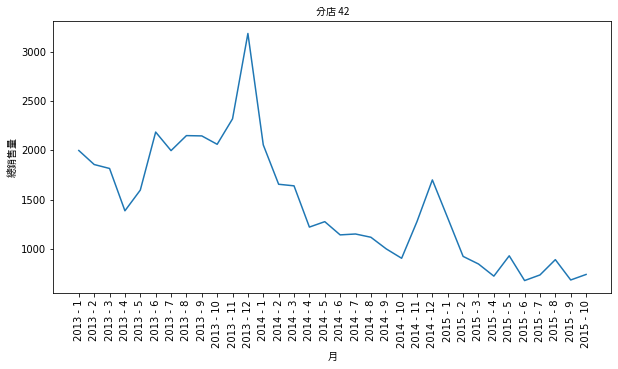

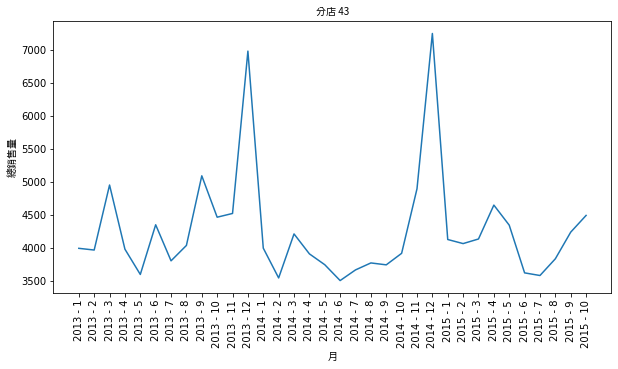

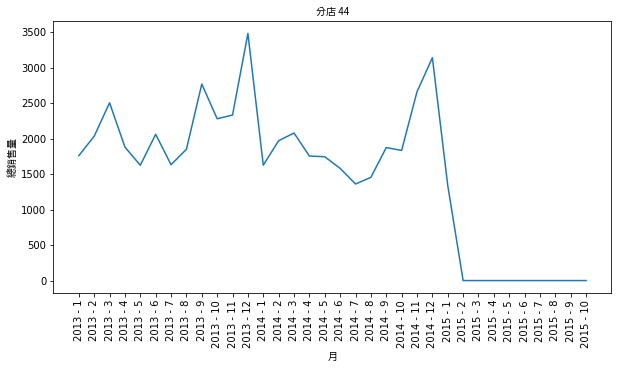

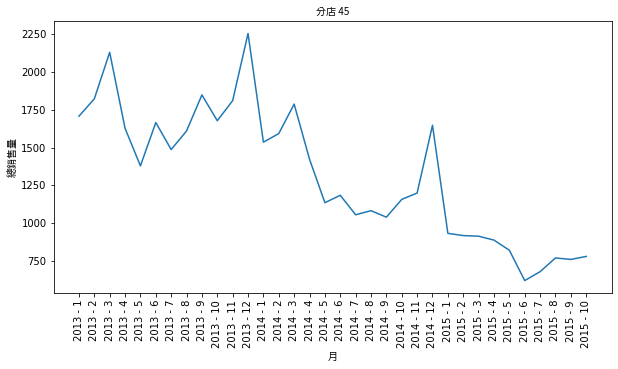

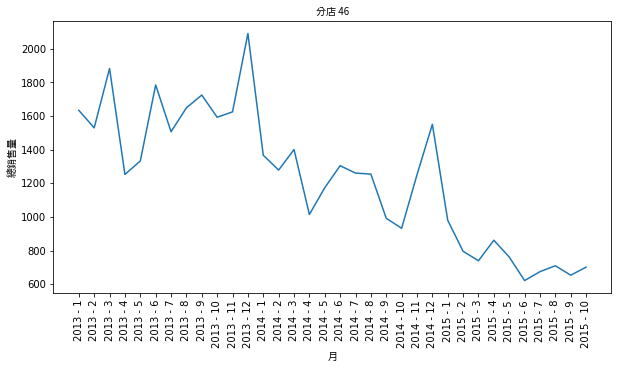

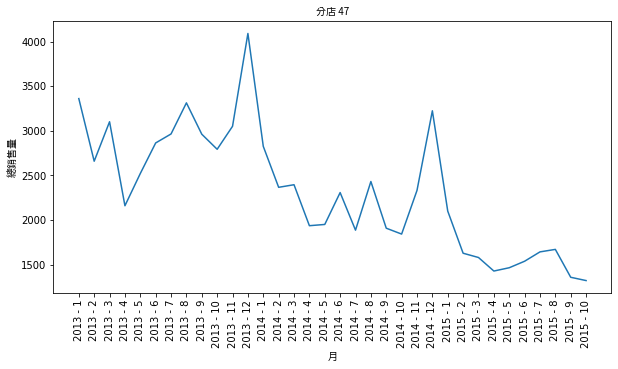

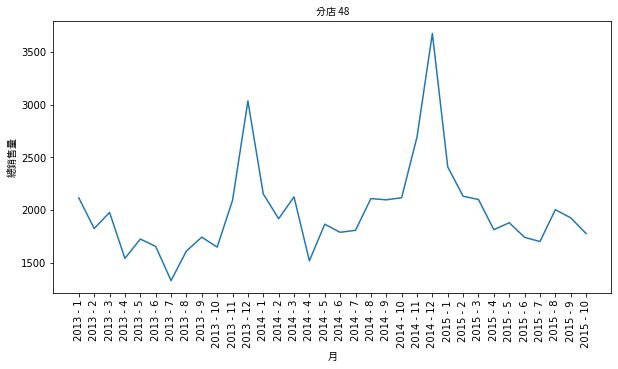

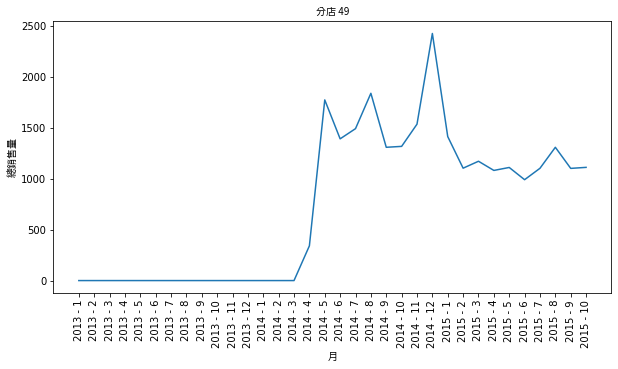

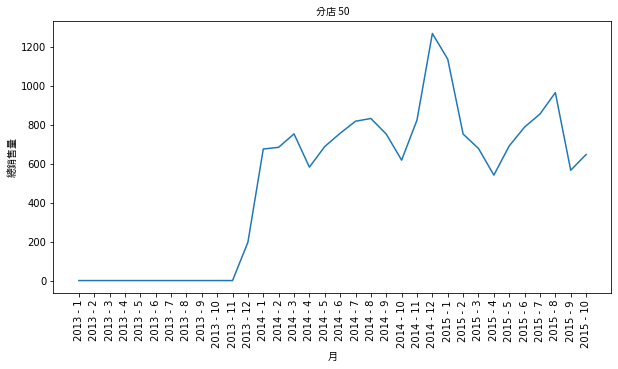

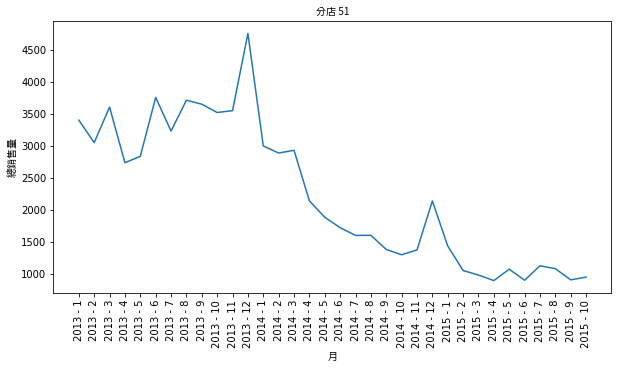

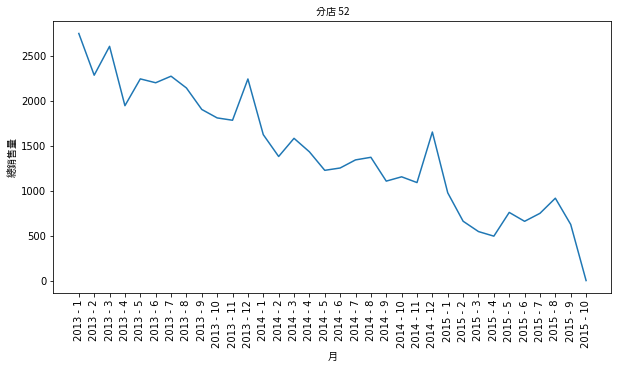

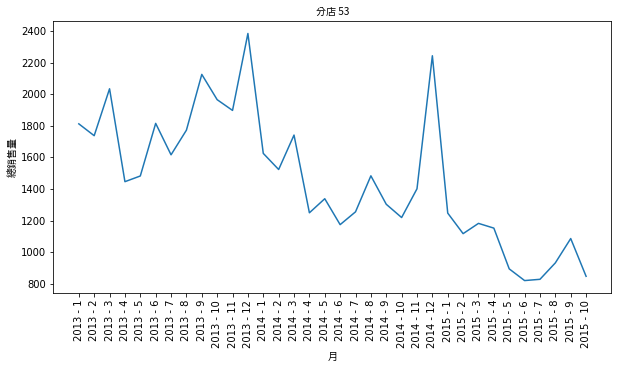

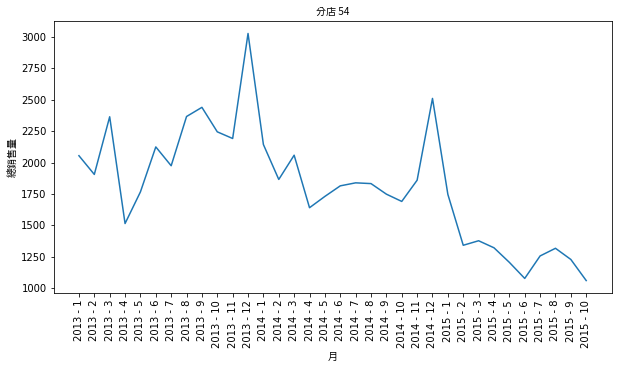

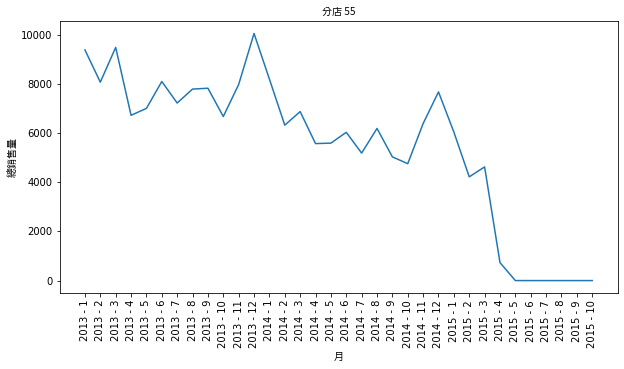

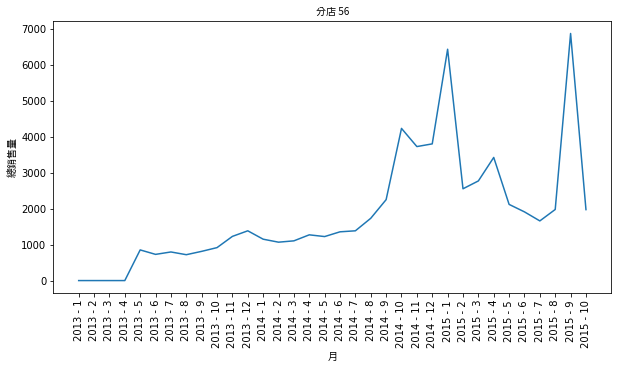

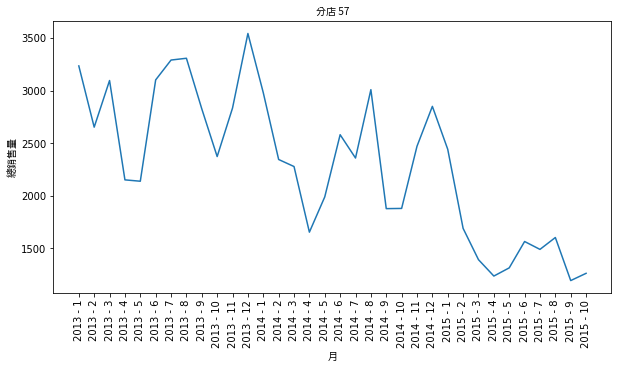

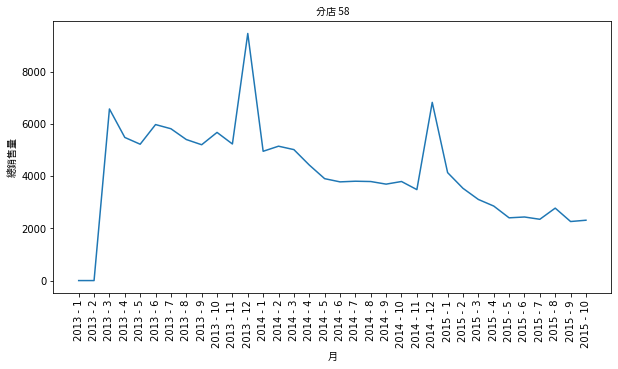

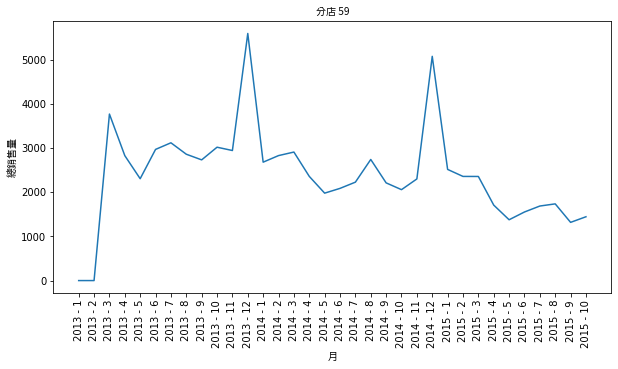

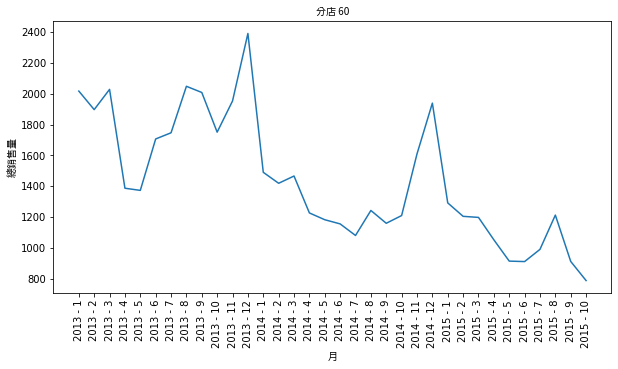

In [ ]:
for j in range(shop_cnt):
    plt.figure(figsize=(10,5))
    plt.plot(d[:,j])
    plt.xticks(ticks=range(34), labels=label, rotation=90)
    plt.xlabel('月', fontproperties=myfont)
    plt.ylabel('總銷售量', fontproperties=myfont)
    plt.title(f'分店 {j+1}', fontproperties=myfont)

## 品項價格

Text(0, 0.5, '平均價格')

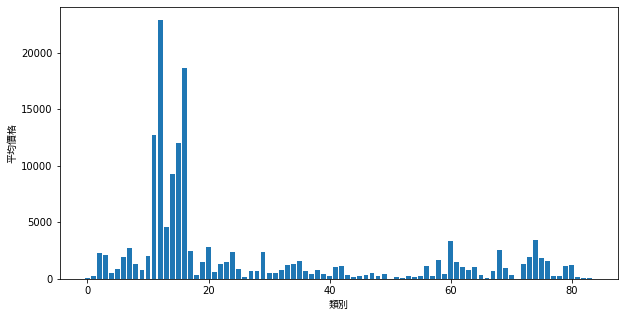

In [ ]:
d = np.zeros([cate_cnt])
plt.figure(figsize=(10,5))
for i in range(cate_cnt):
    d[i] = np.mean(df['item_price'][df['item_category_id'] == i])

plt.bar(range(cate_cnt), d)
plt.xlabel('類別',fontproperties=myfont)
plt.ylabel('平均價格',fontproperties=myfont)


## 分店品項關係

In [ ]:
d = np.zeros([shop_cnt, cate_cnt])

In [ ]:
shop_id = df['shop_id']
item_id = df['item_cnt_day']
cate_id = df['item_category_id']
for shop in range(shop_cnt):
    for cate in range(cate_cnt):
        d[shop,cate] = np.sum(item_id[(shop_id == shop) & (cate_id == cate)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


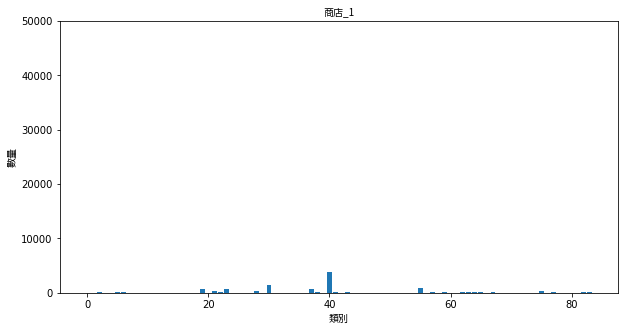

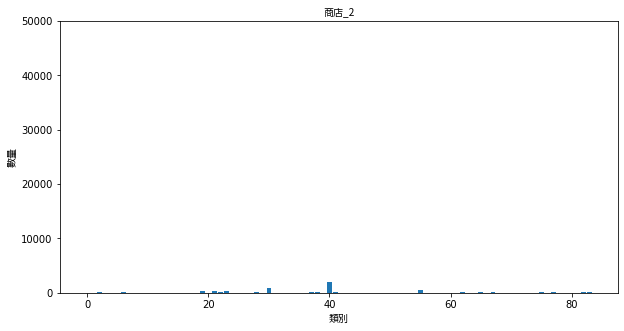

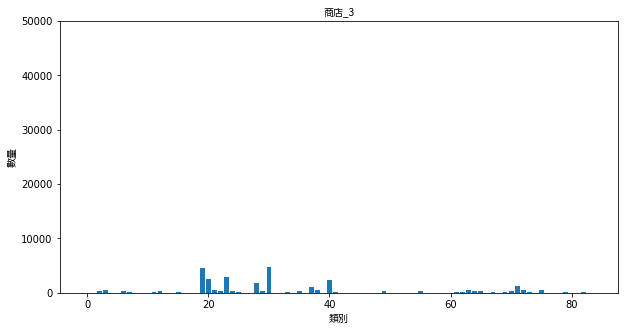

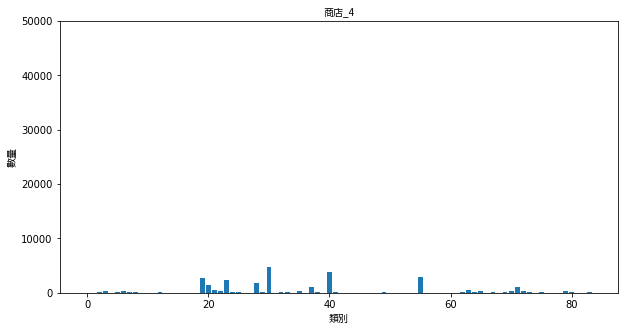

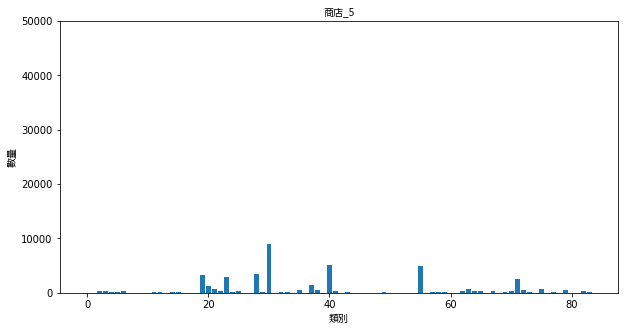

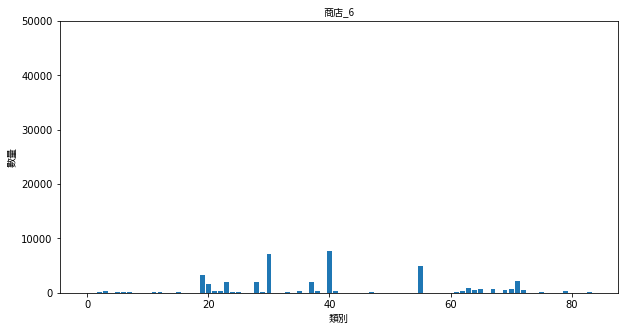

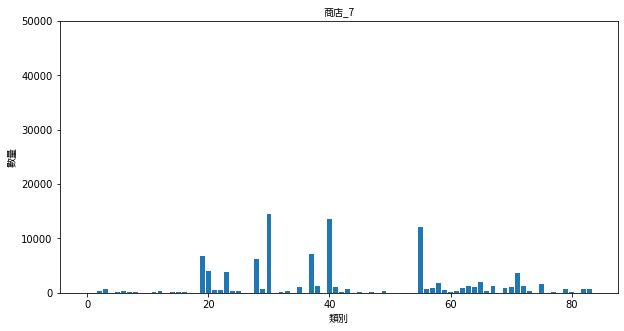

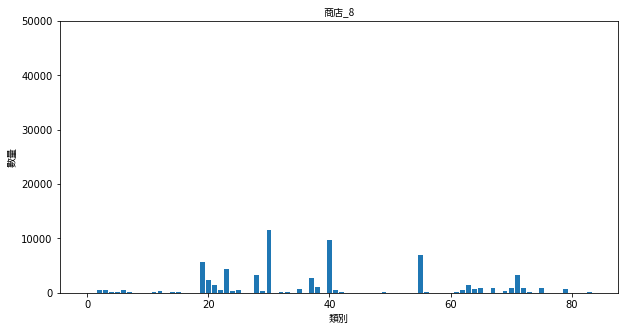

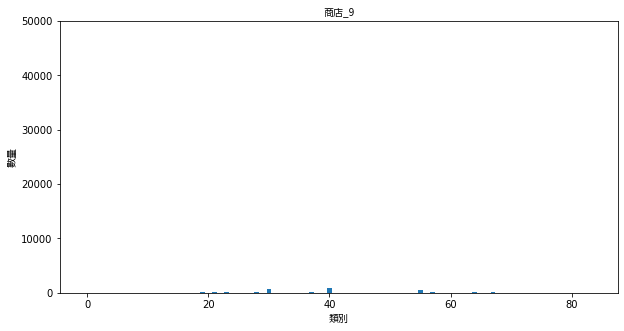

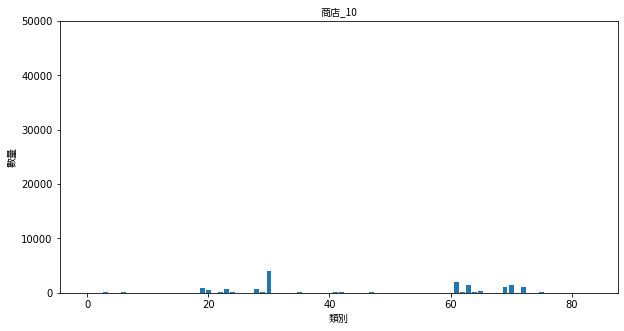

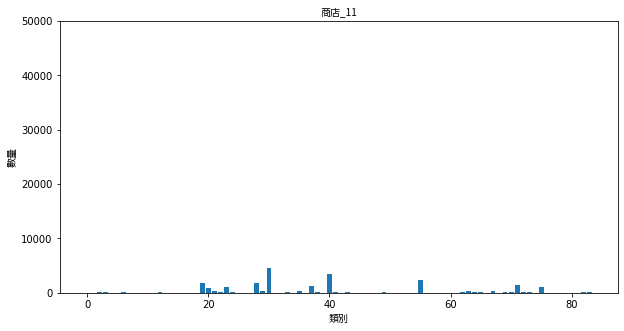

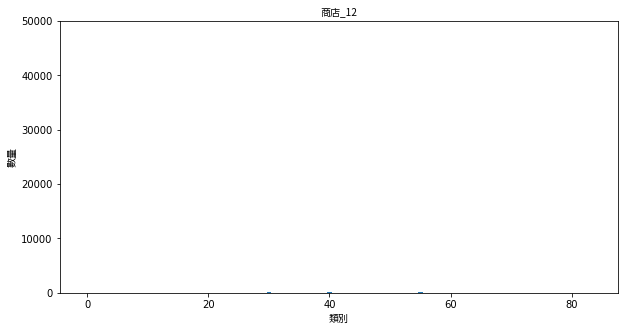

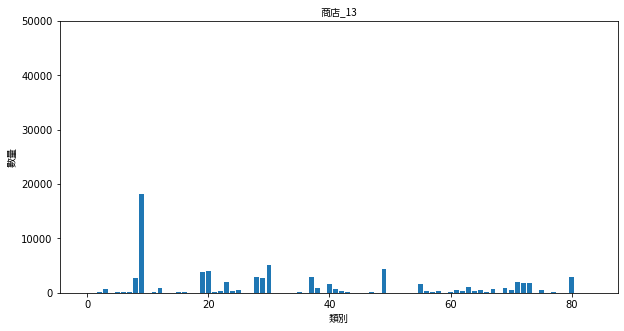

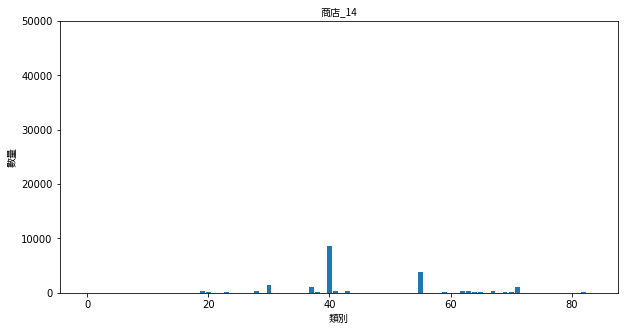

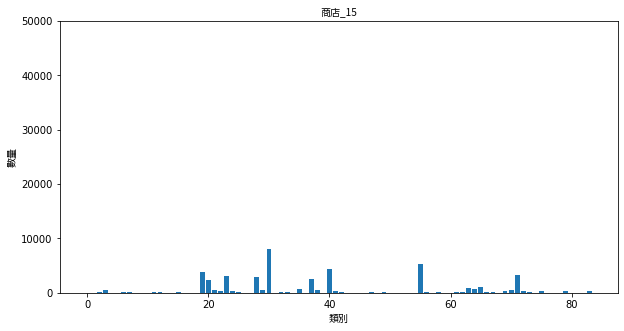

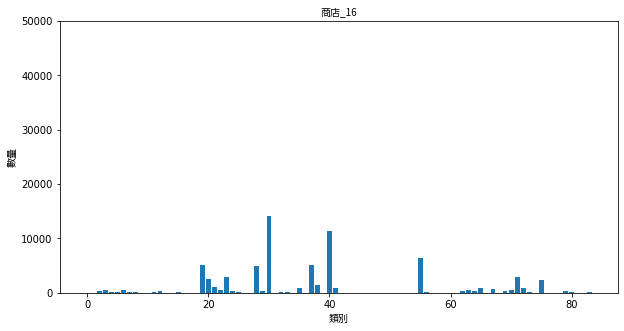

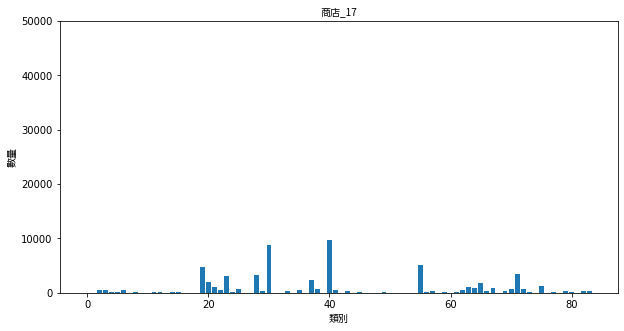

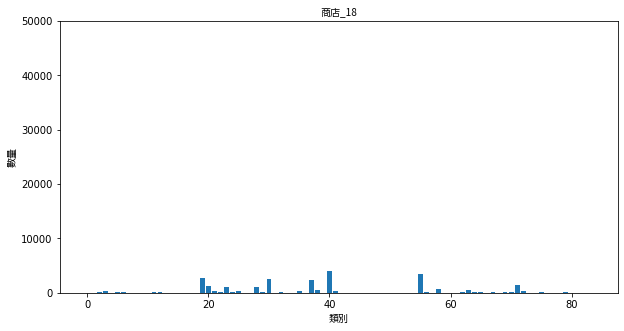

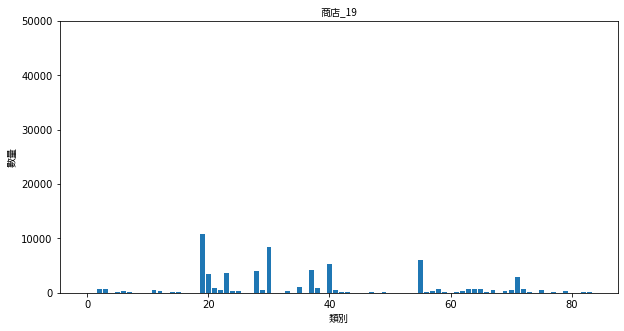

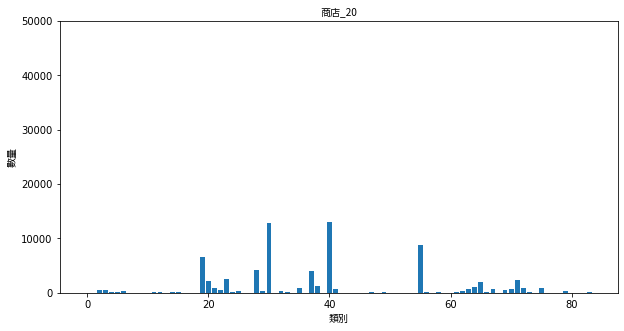

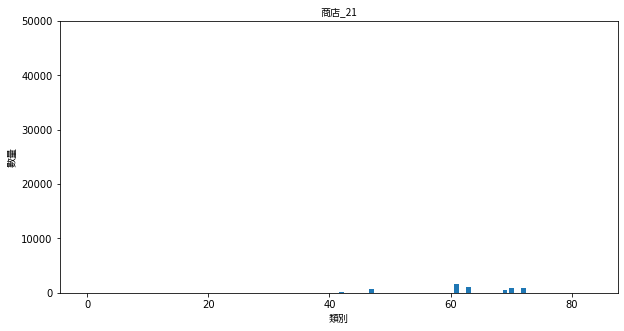

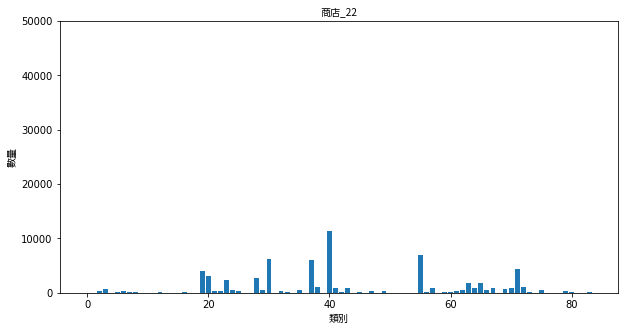

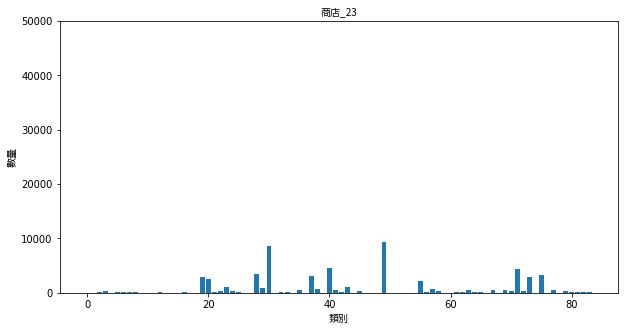

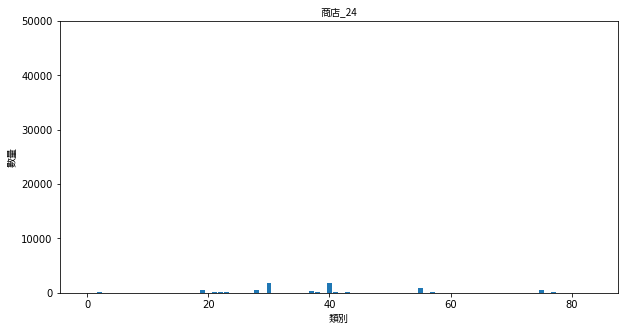

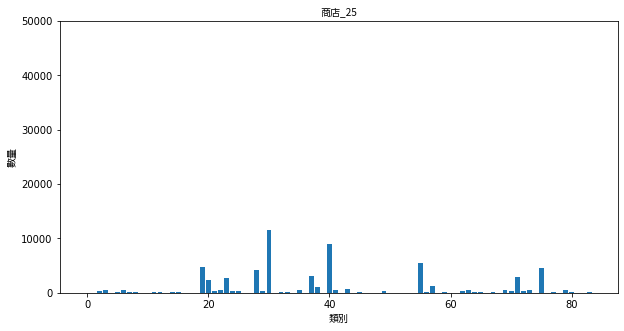

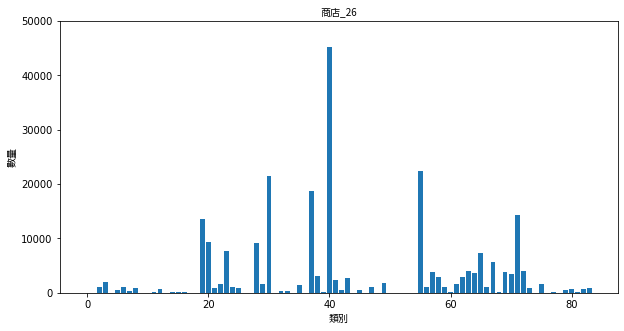

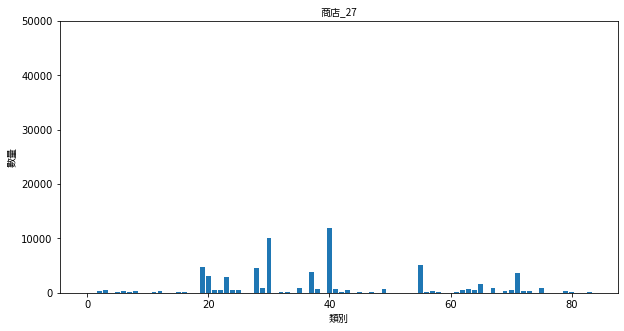

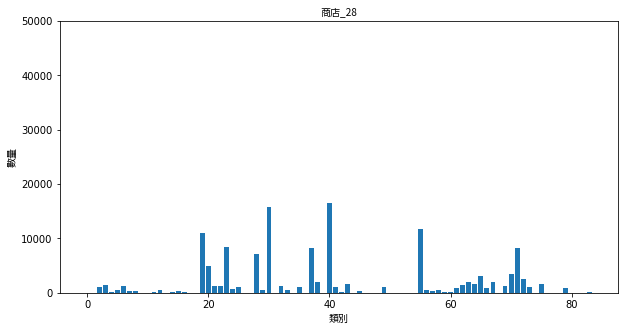

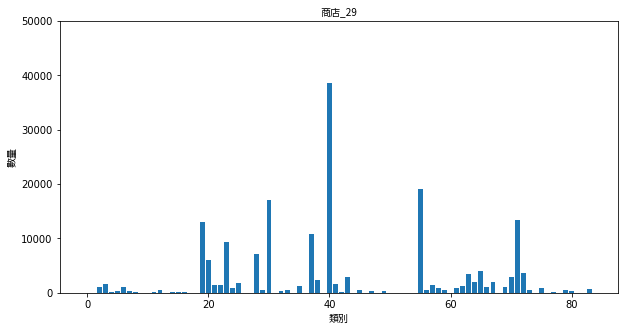

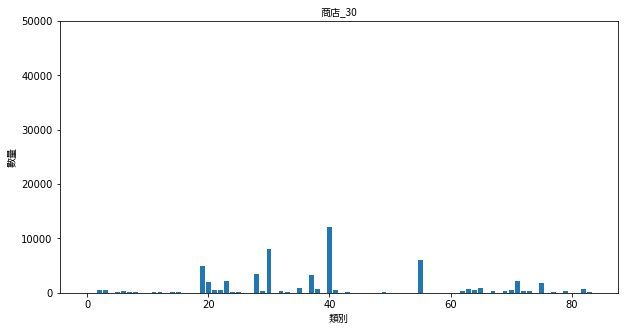

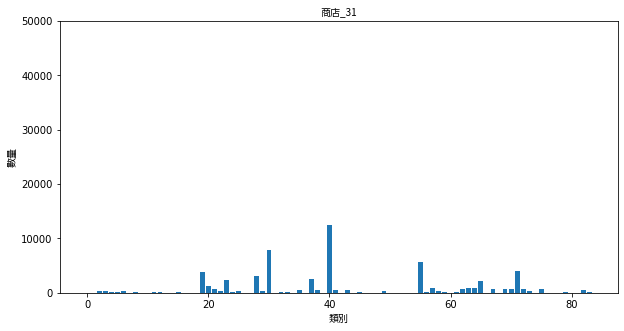

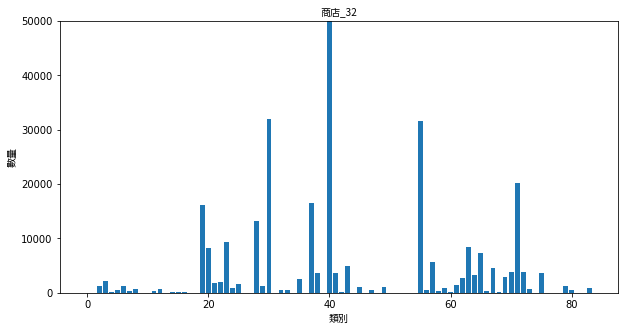

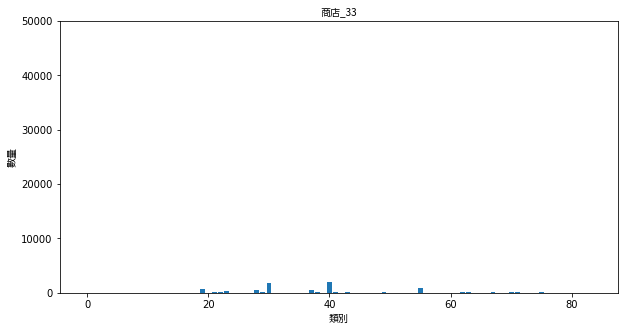

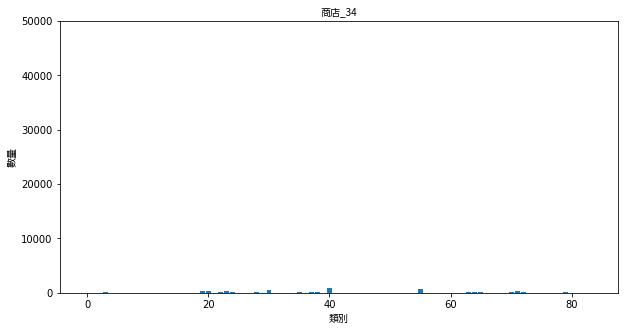

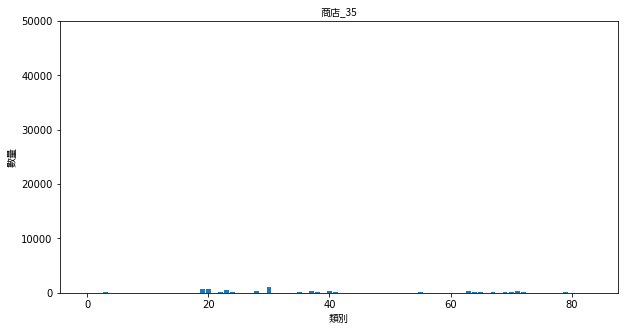

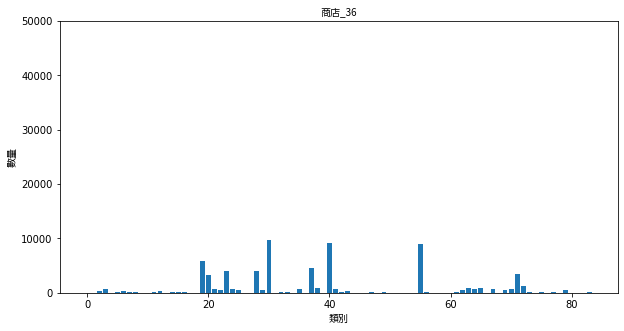

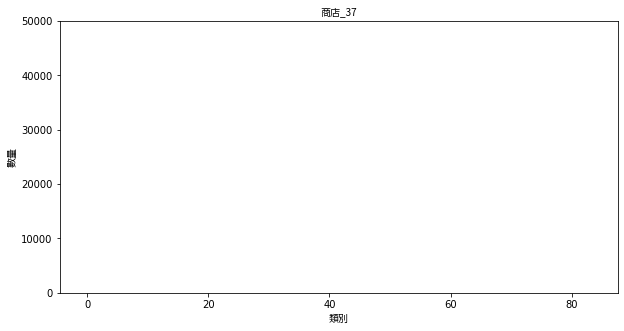

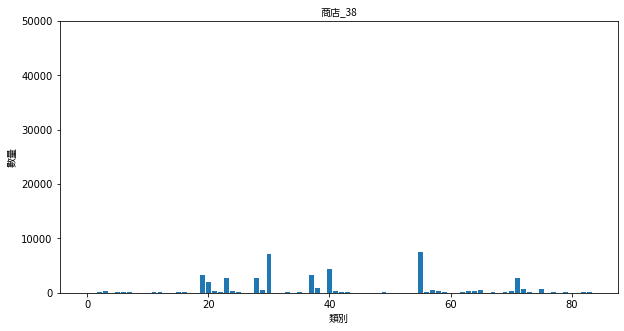

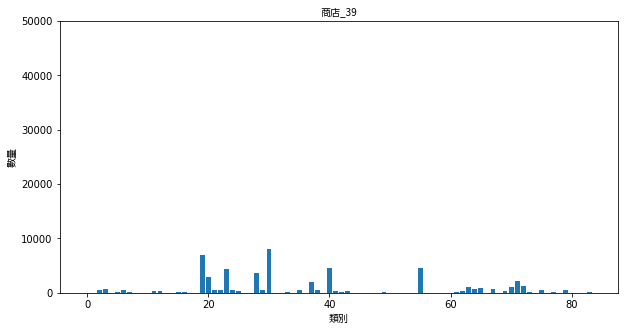

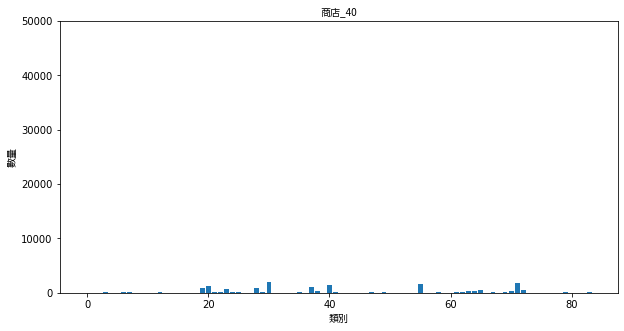

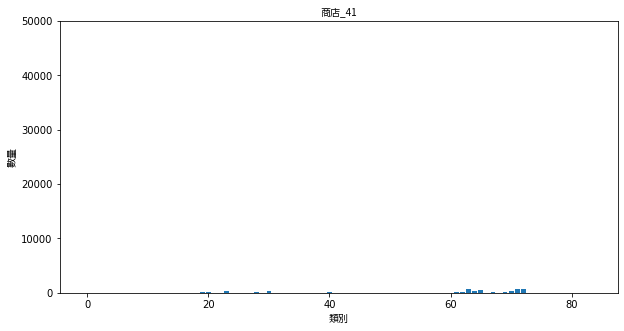

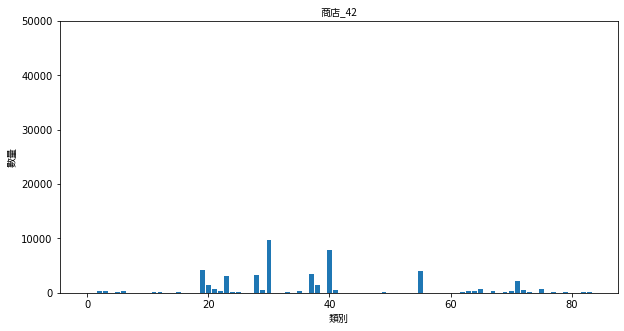

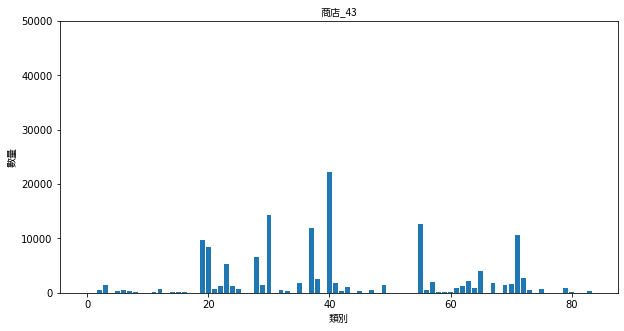

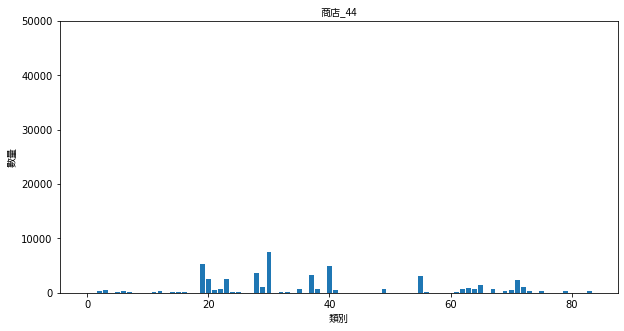

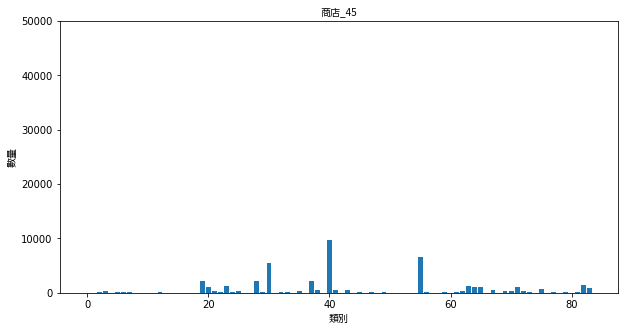

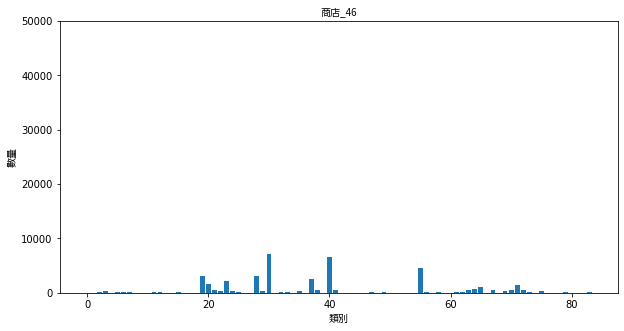

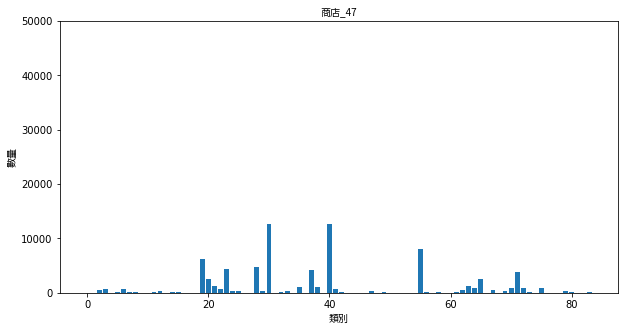

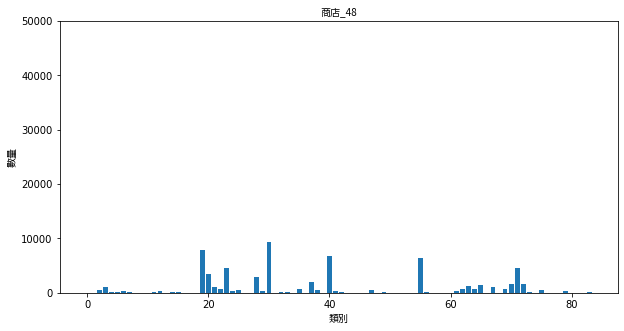

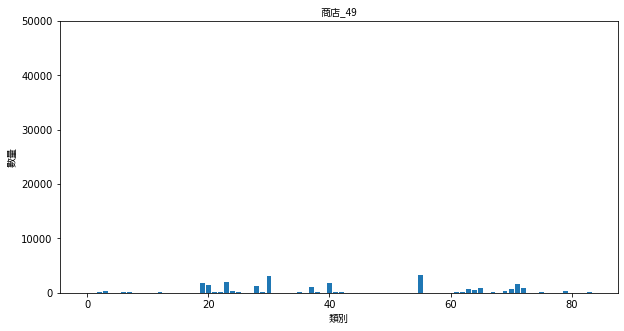

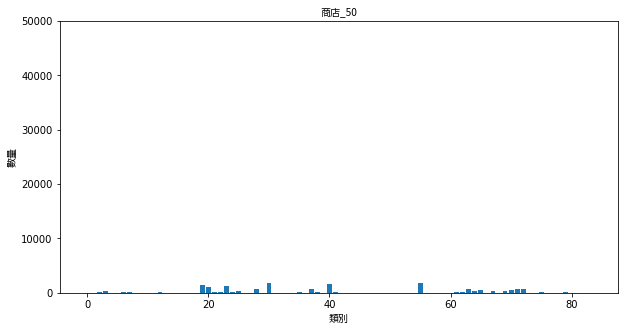

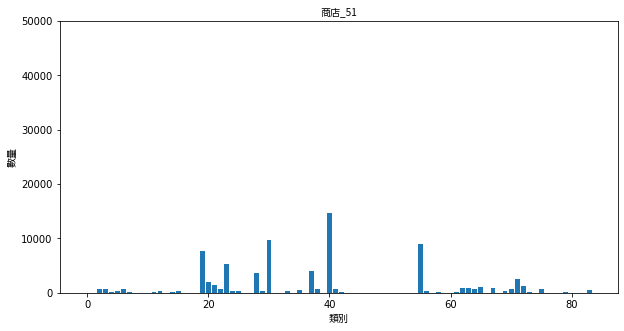

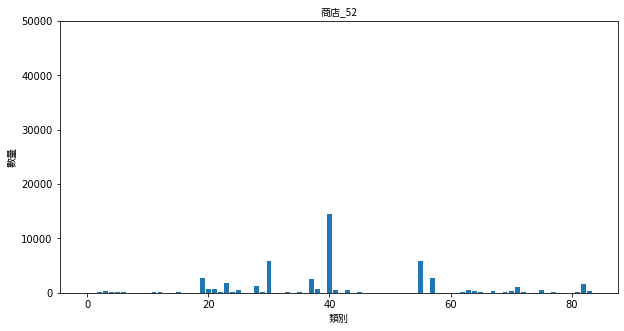

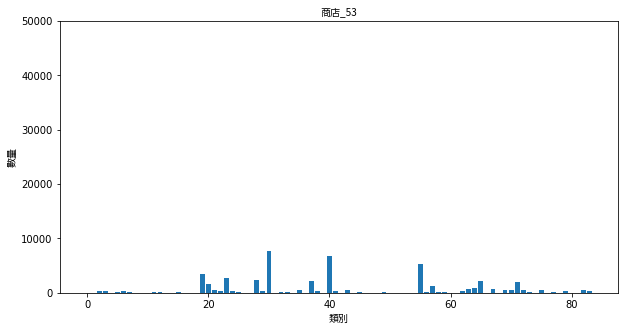

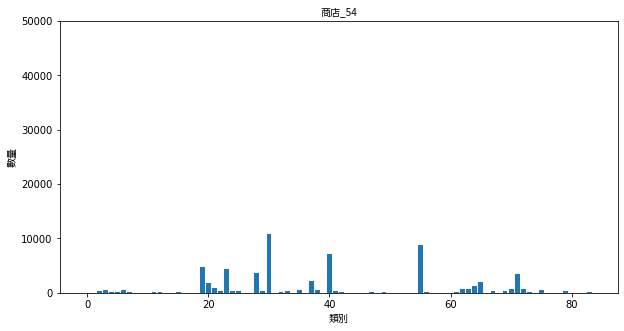

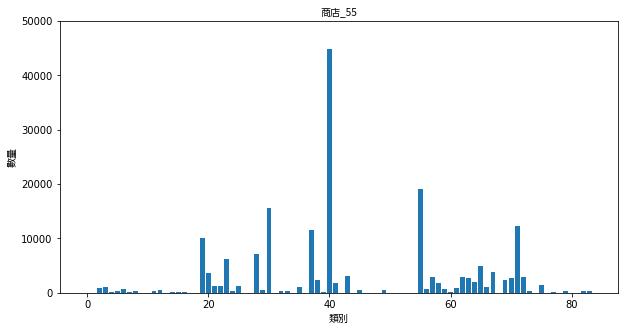

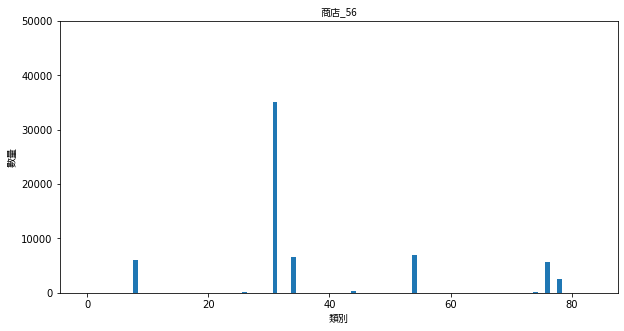

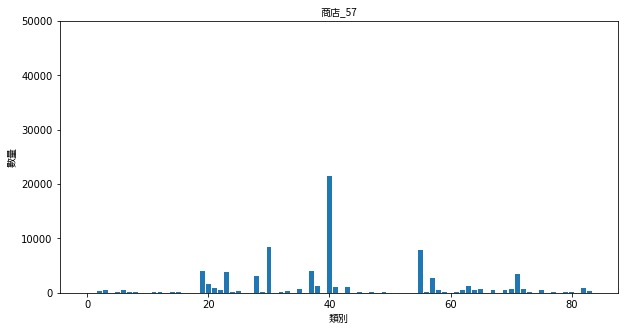

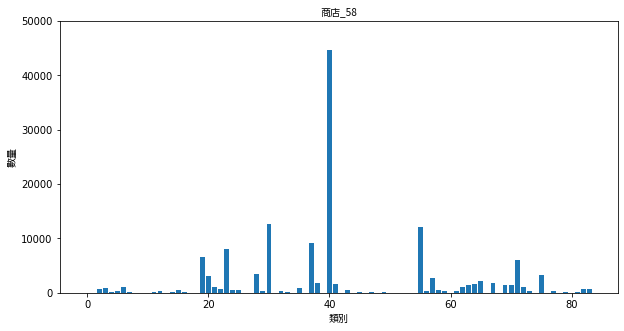

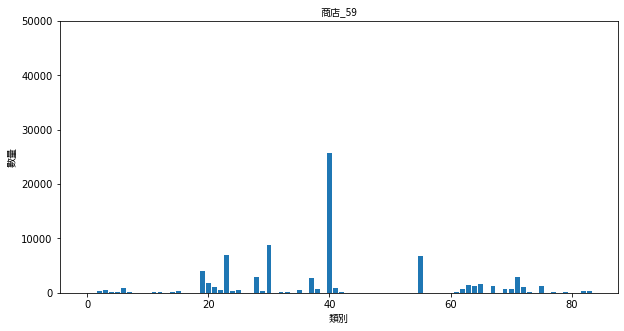

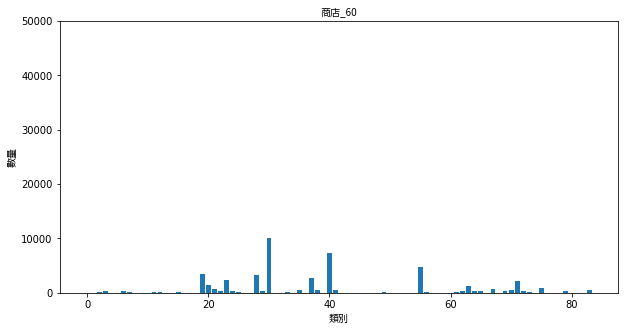

In [ ]:
for shop in range(shop_cnt):
    plt.figure(figsize=(10,5))
    plt.bar(range(cate_cnt),d[shop,:])
    
    plt.title(f'商店_{shop+1}',fontproperties=myfont)
    plt.ylabel('數量',fontproperties=myfont)
    plt.xlabel('類別',fontproperties=myfont)
    plt.ylim([0,50000])

    

## 類別和物件

In [ ]:
d = np.zeros([month_cnt,item_cnt]) 

In [ ]:
month_id = df['date_block_num']
item_id_cnt = df['item_cnt_day']
cate_id = df['item_category_id']


for month in range(month_cnt):
    item_ids = df[(month_id == month)]['item_id']  
    d[month,item_ids] += item_id_cnt[item_ids.index]

In [ ]:
select_cate_id = 40
item_in_cate = df_itemCategory[df_itemCategory['item_category_id'] == select_cate_id]['item_id']

類別總和

Text(0.5, 1.0, '類別_40')

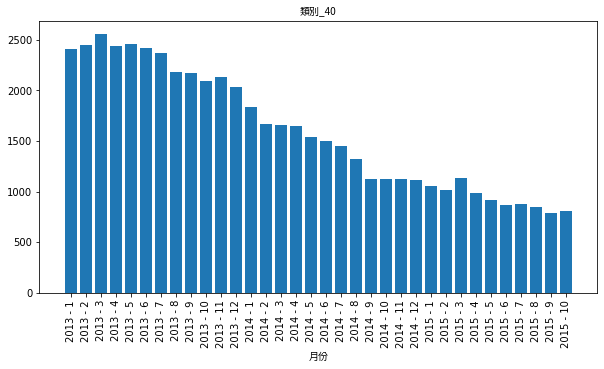

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(month_cnt),np.sum(d[:,item_in_cate],axis=1))

dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]
plt.xticks(ticks=range(34), labels=label, rotation=90)
plt.xlabel('月份',fontproperties=myfont)
plt.title(f'類別_{select_cate_id}',fontproperties=myfont)

各物件

In [ ]:
print(len(item_in_cate))
for item in item_in_cate:
    
    plt.figure(figsize=(10,5))
    plt.bar(range(month_cnt),d[:,item])

    dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
    label = [f'{d.year} - {d.month}' for d in dateList]
    plt.xticks(ticks=range(34), labels=label, rotation=90)
    plt.xlabel('月份',fontproperties=myfont)
    plt.title(f'物件_{item}',fontproperties=myfont)

## 價格 vs 銷量

In [ ]:
d = np.zeros([item_cnt,2]) #[cnt,price]

In [ ]:
for item in range(item_cnt):
    d[item,1] = np.mean(df[df['item_id'] == item]['item_price'])
    d[item,0] += np.sum(df[df['item_id'] == item]['item_cnt_day'])

Text(0, 0.5, '總銷量')

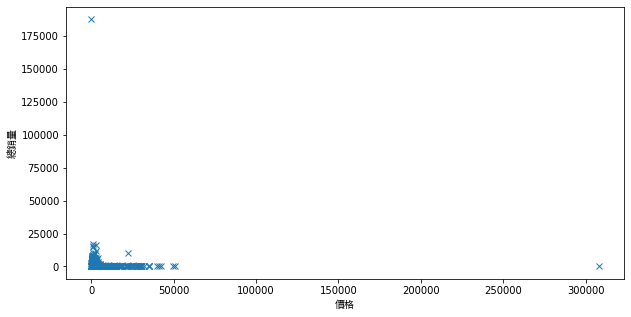

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(d[:,1],d[:,0],'x')

plt.xlabel('價格',fontproperties=myfont)
plt.ylabel('總銷量',fontproperties=myfont)

## 商店&物品

In [ ]:
# [month,shop,item,(count,category)]
d = np.zeros([month_cnt,shop_cnt,item_cnt,2])

In [ ]:
shop_id = df['shop_id']
item_id = df['item_id']
month_id = df['date_block_num']
item_id_cnt = df['item_cnt_day']
cate_id = df['item_category_id']

for month in range(month_cnt):
    for shop in range(shop_cnt):        
        select_item_id = item_id[(month_id == month) & (shop_id == shop)]
        select_item_cnt = item_id_cnt[(month_id == month) & (shop_id == shop)]
                
        d[month,shop,select_item_id,0] += select_item_cnt   

d[:,:,:,1] = df_itemCategory['item_category_id']
    

Text(0.5, 0, '月份')

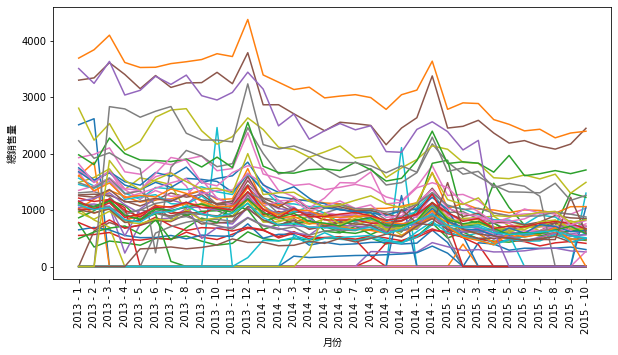

In [ ]:
plt.figure(figsize=(10,5))

dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]
plt.xticks(ticks=range(34), labels=label, rotation=90)

plt.plot(np.sum(d[:,:,:,0],axis=2))

plt.ylabel('總銷售量',fontproperties=myfont)
plt.xlabel('月份',fontproperties=myfont)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


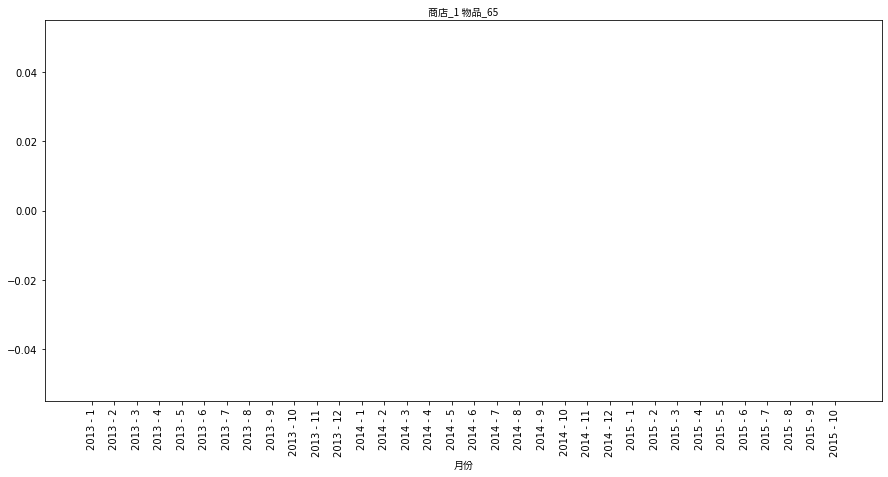

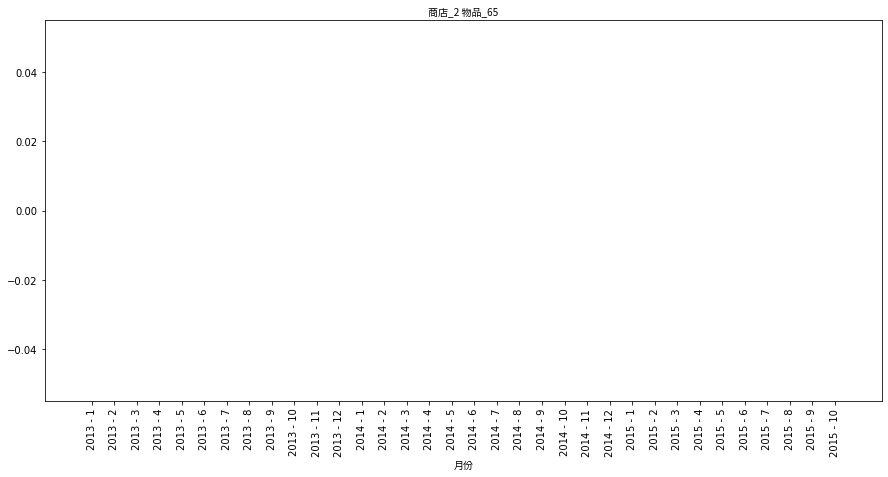

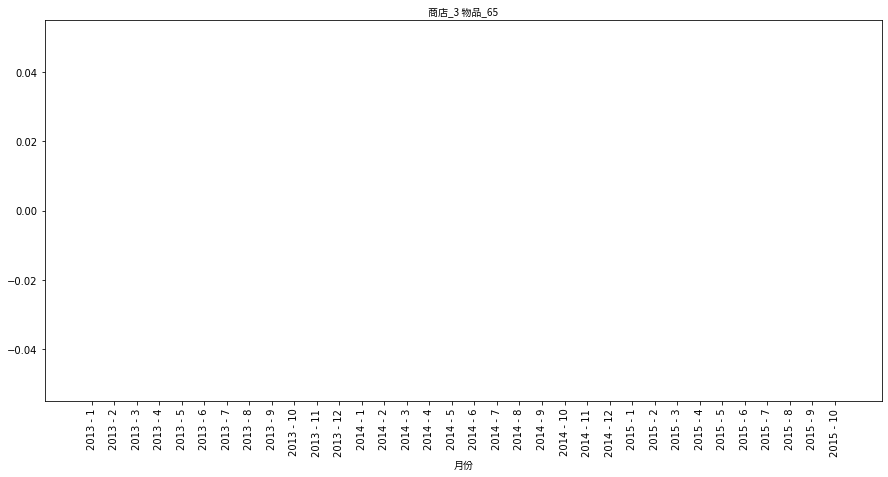

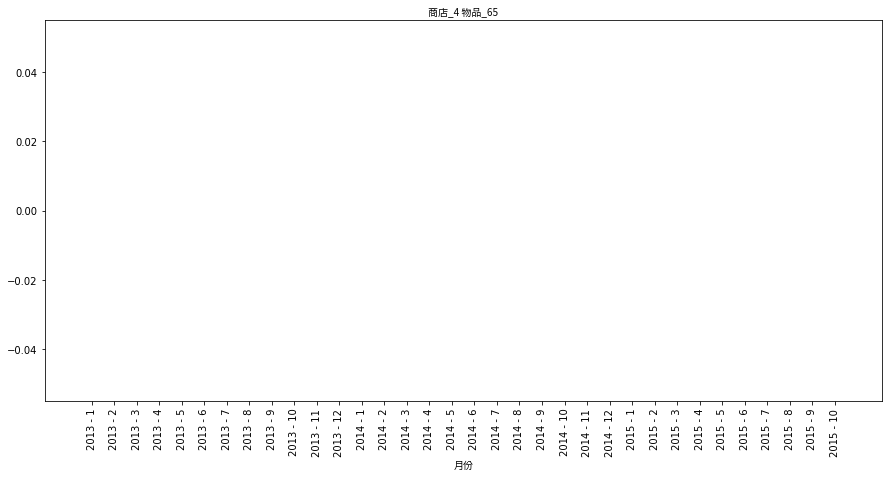

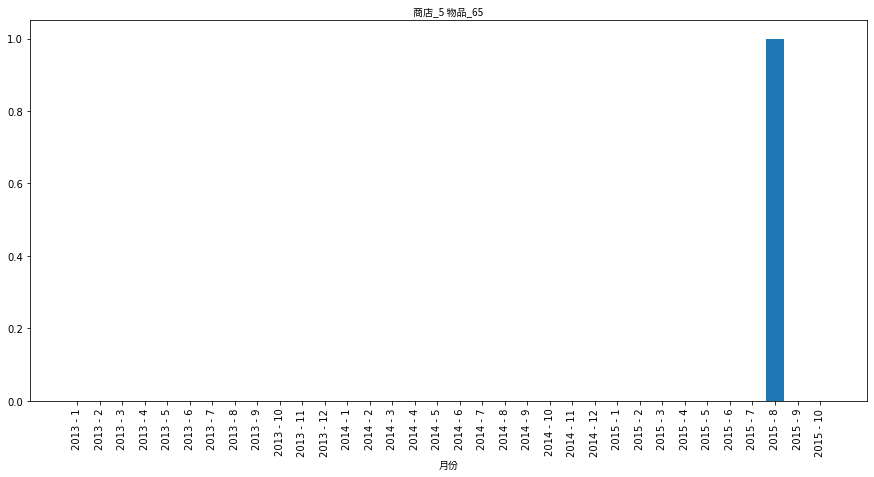

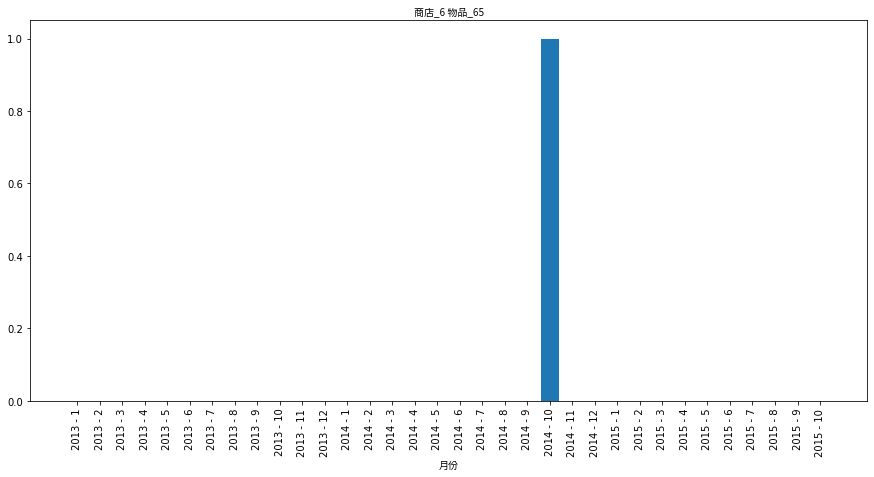

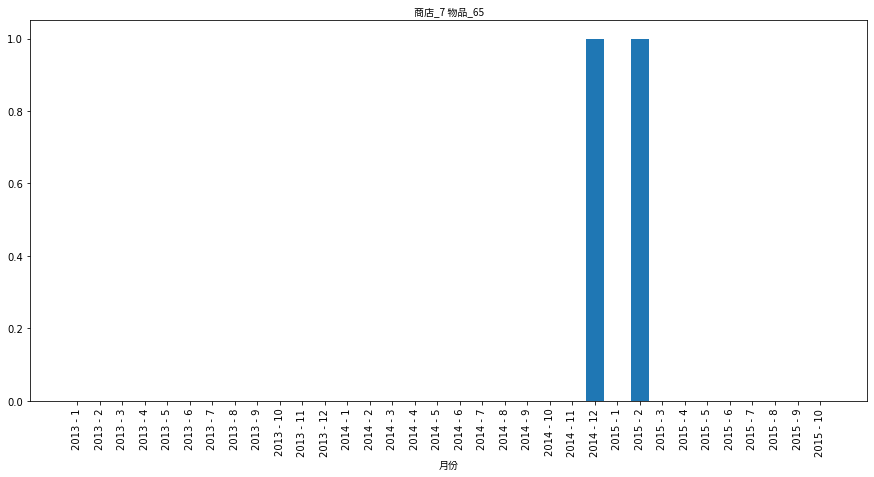

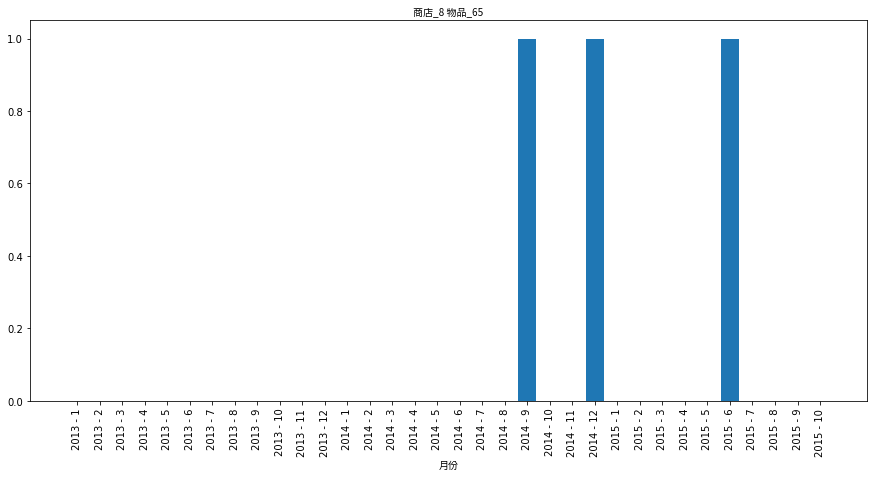

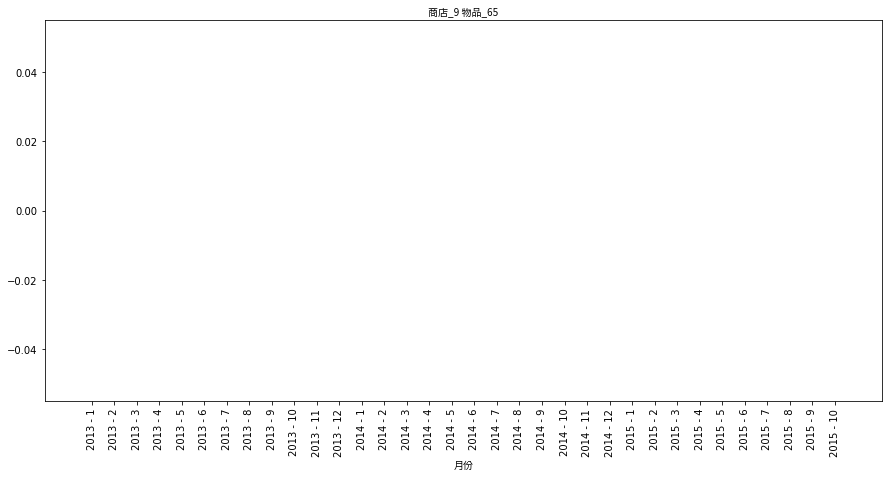

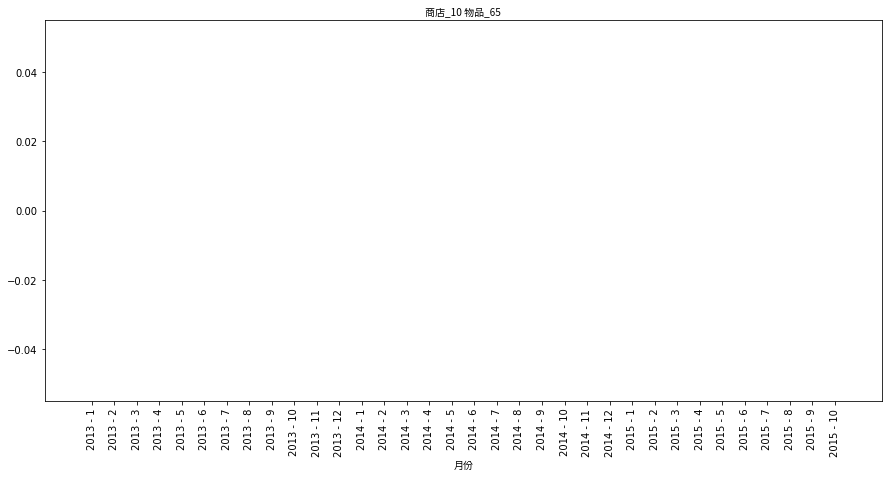

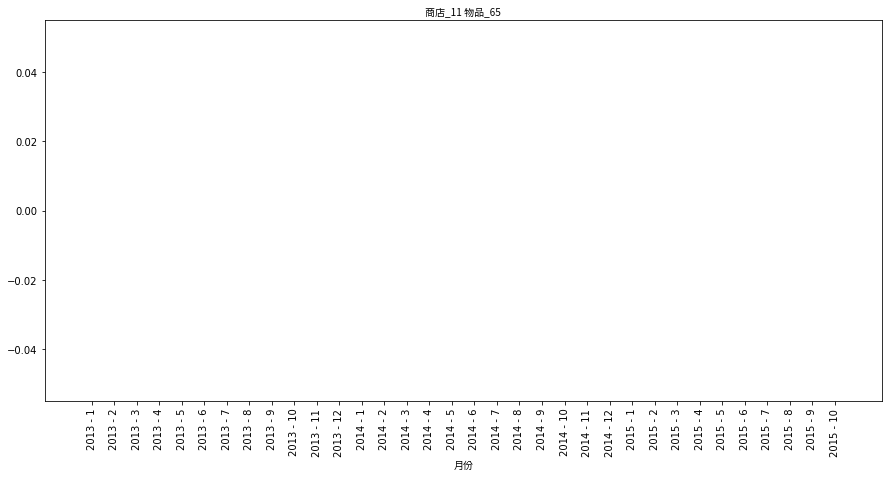

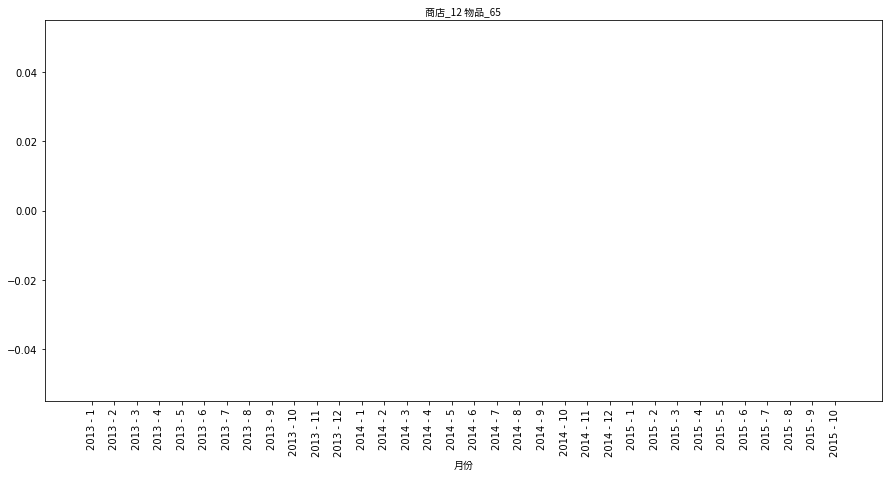

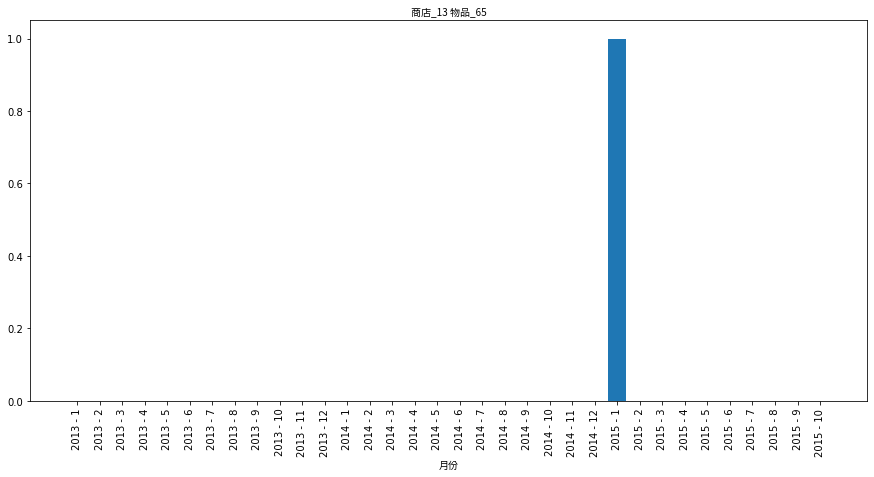

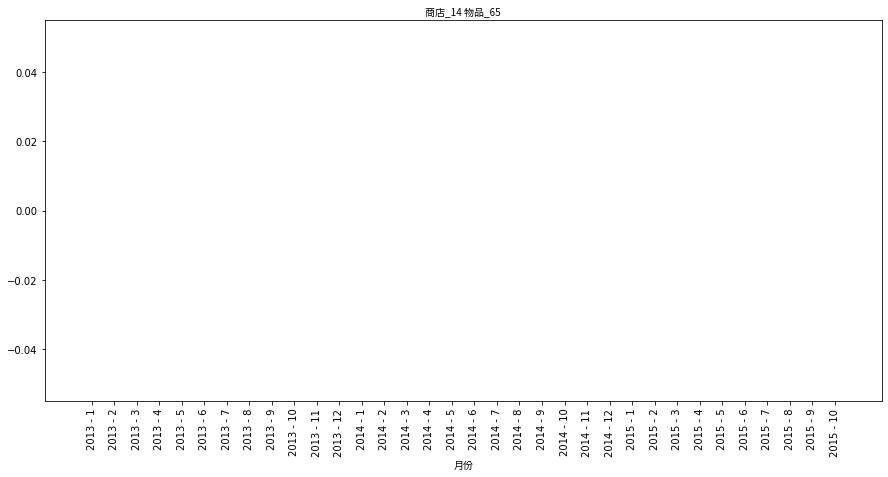

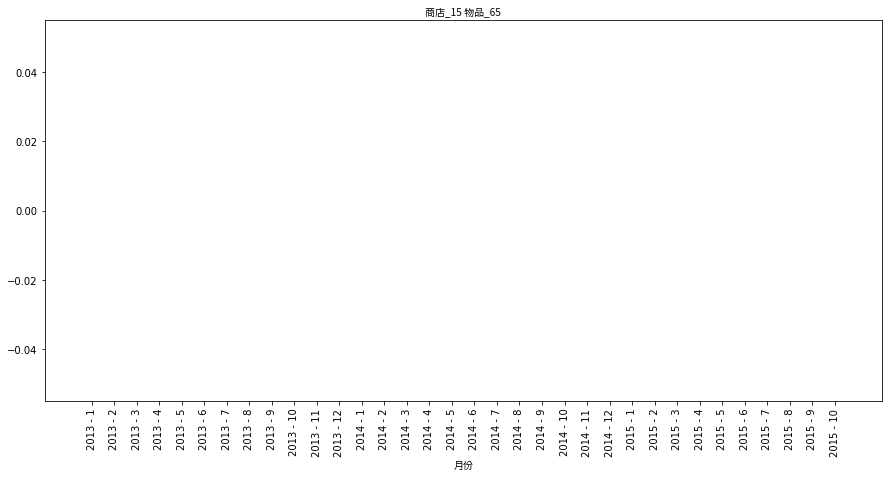

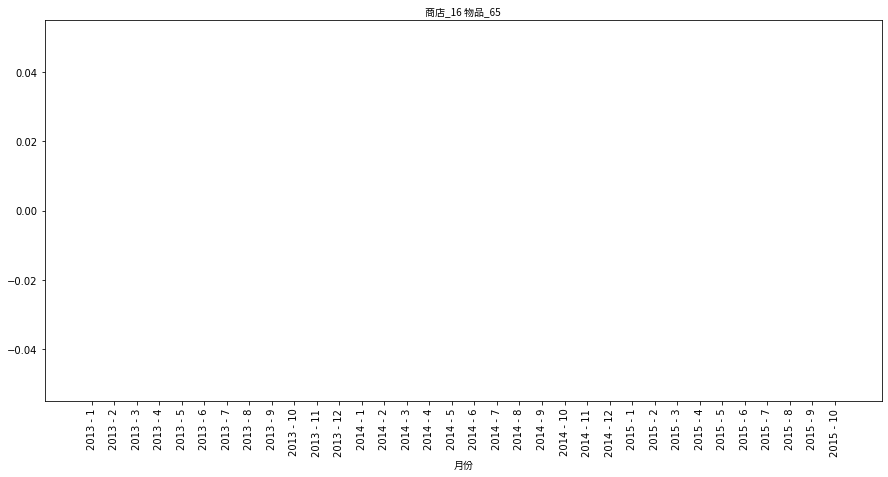

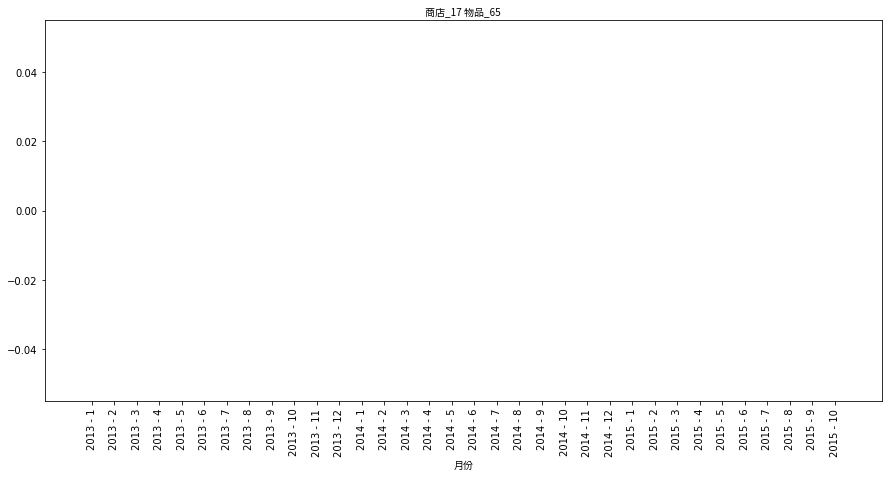

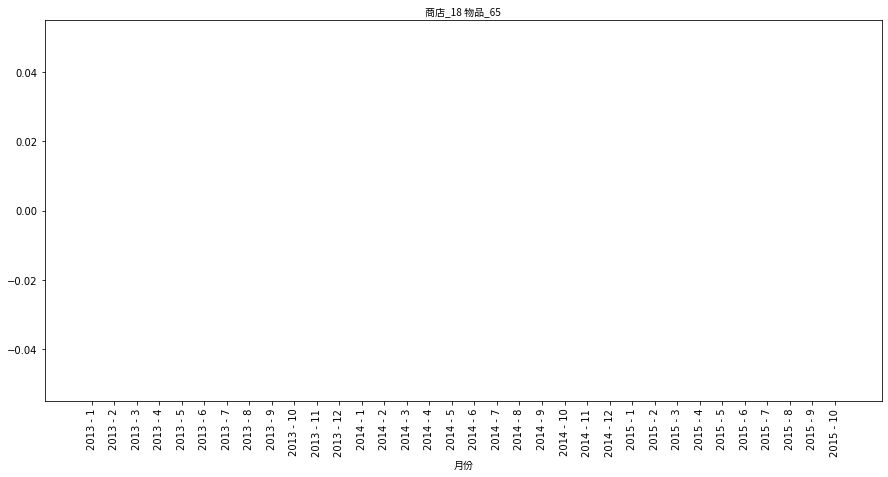

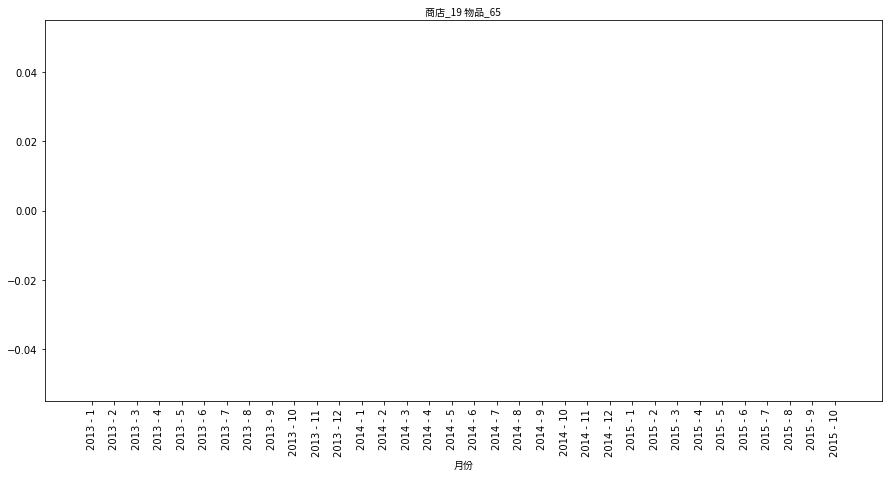

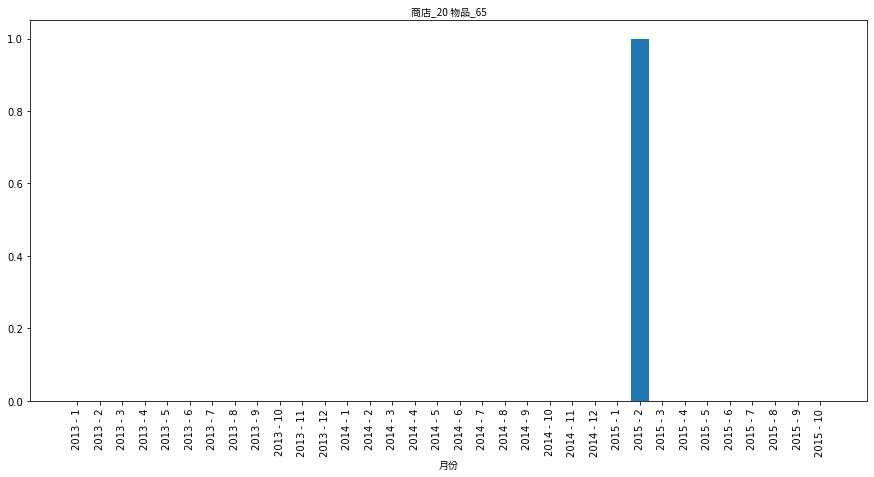

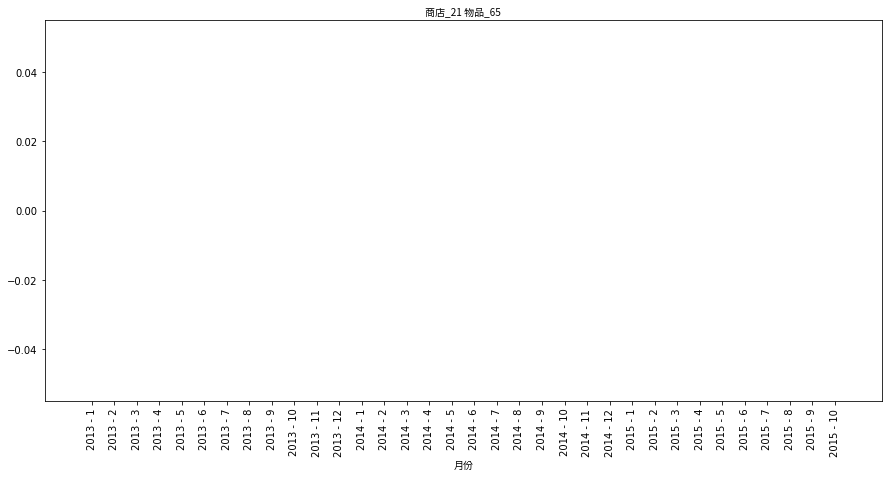

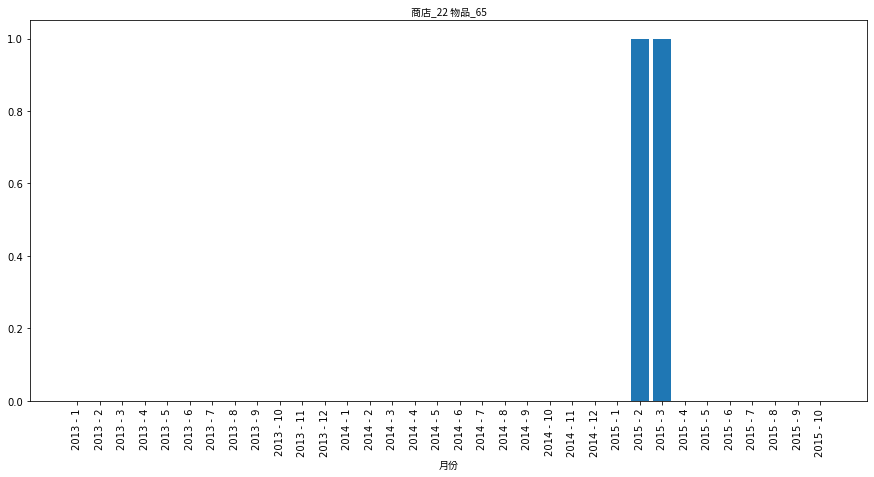

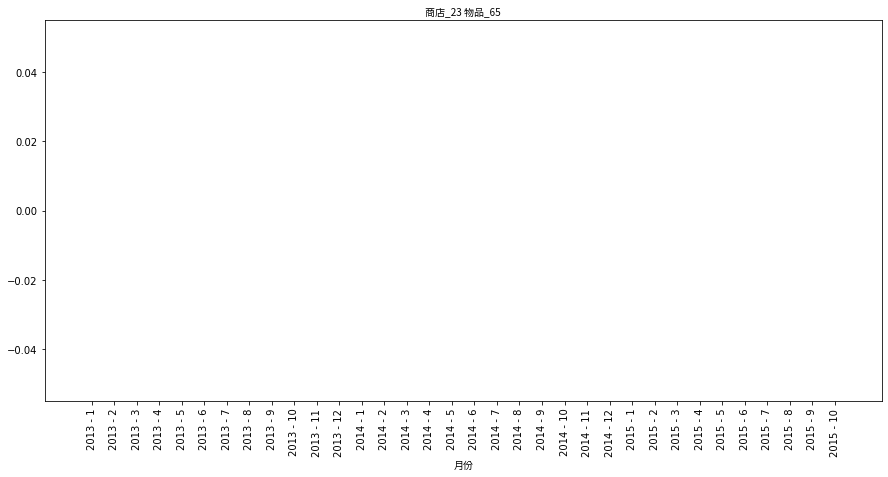

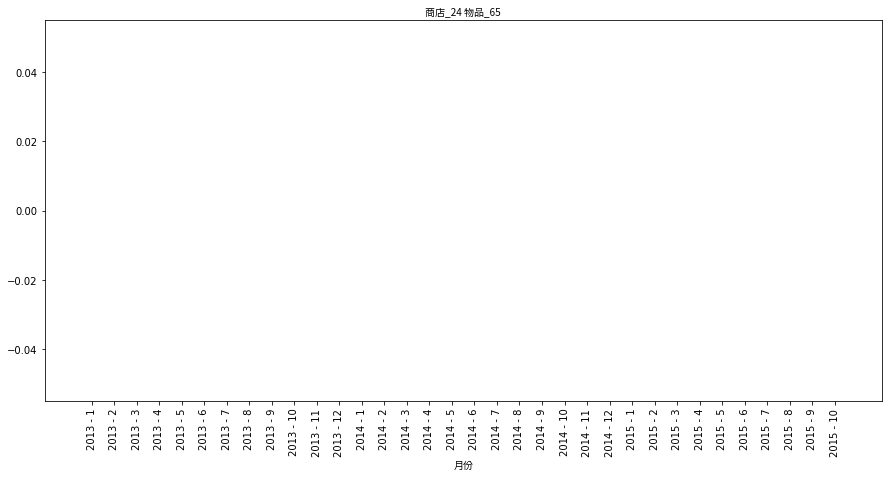

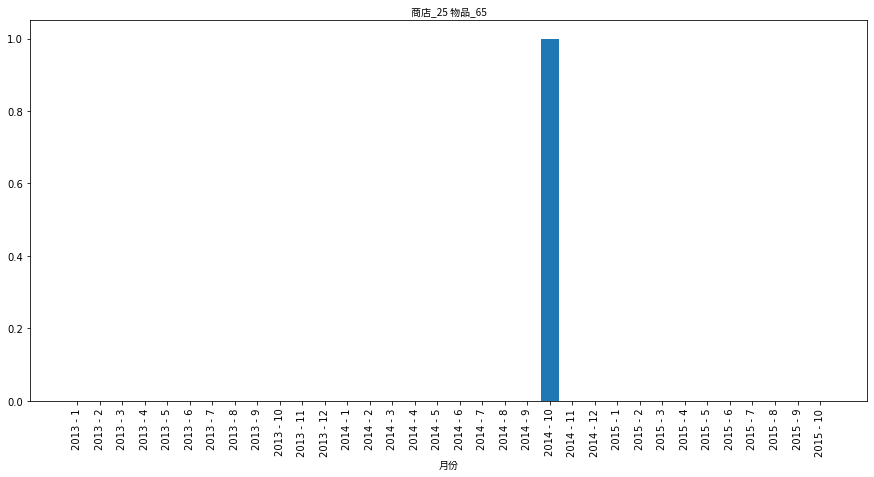

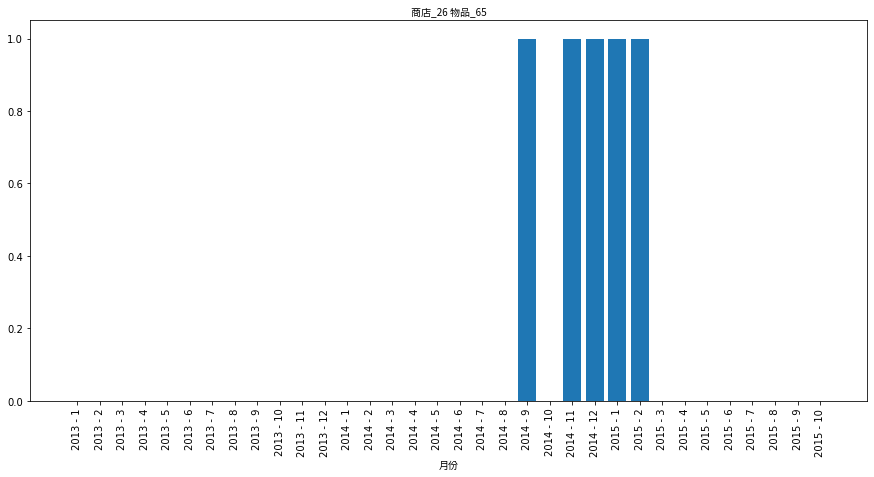

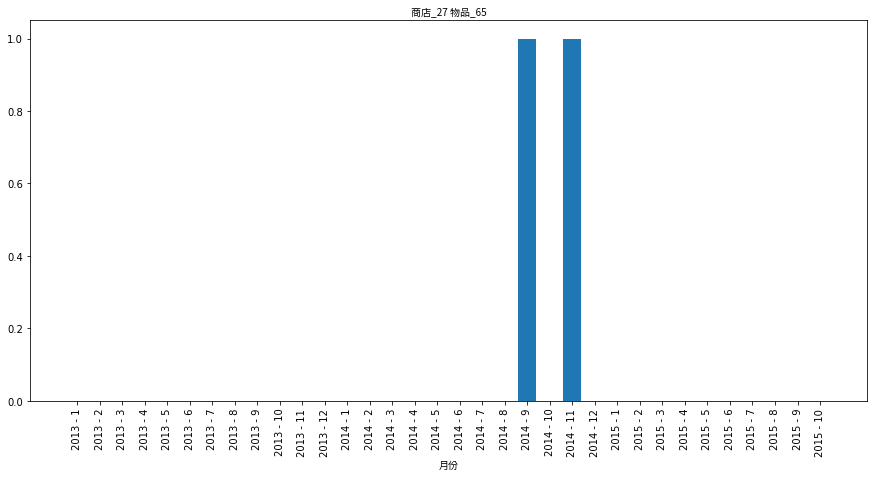

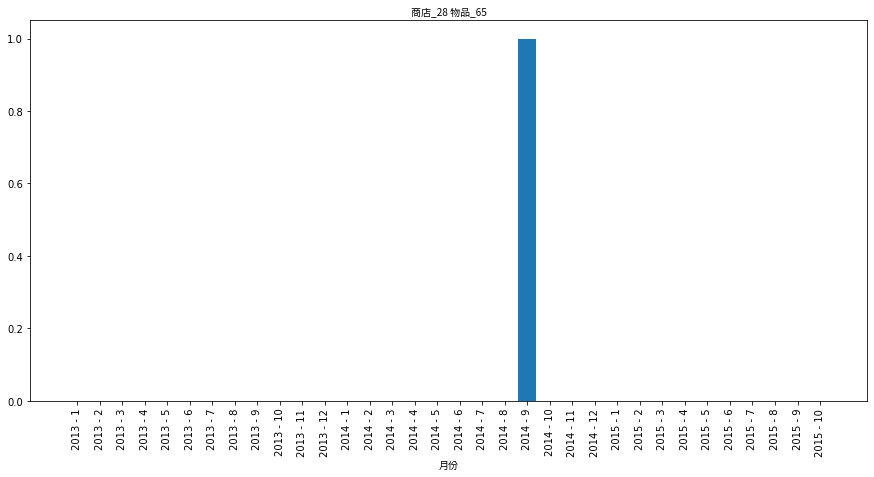

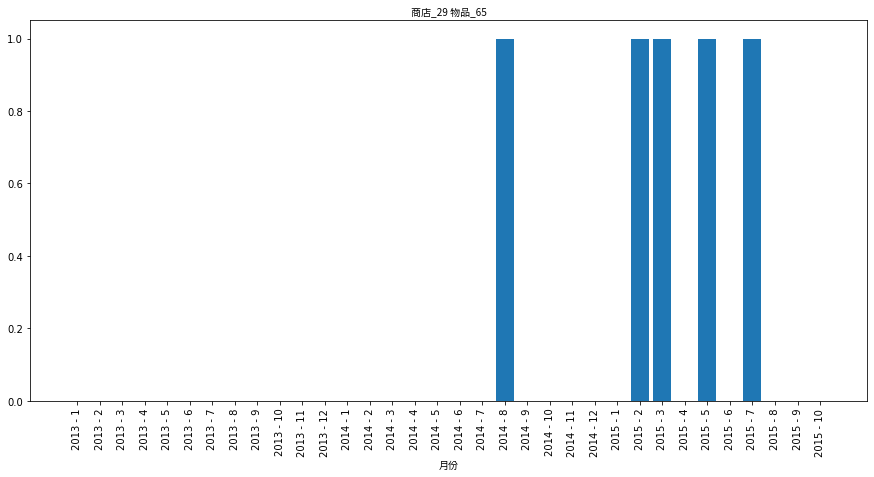

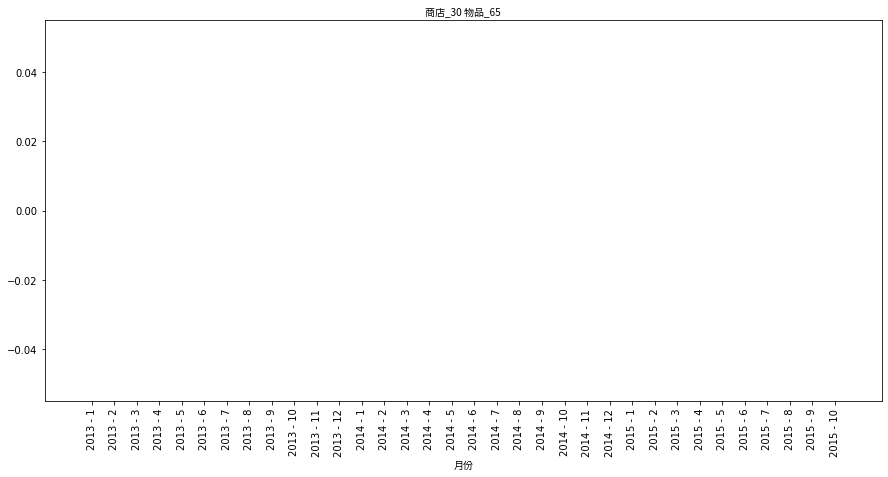

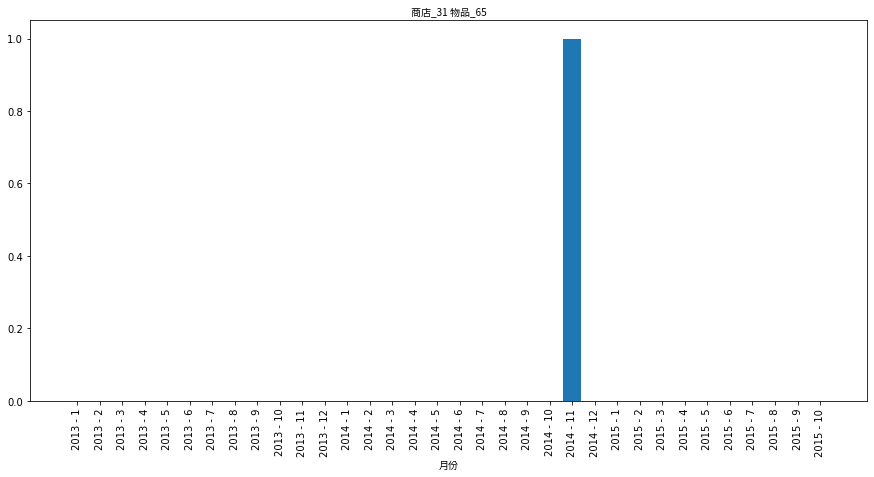

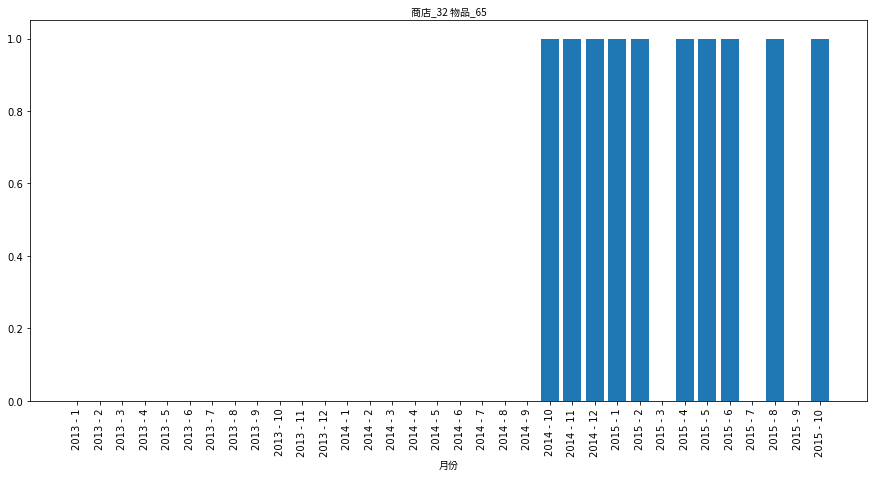

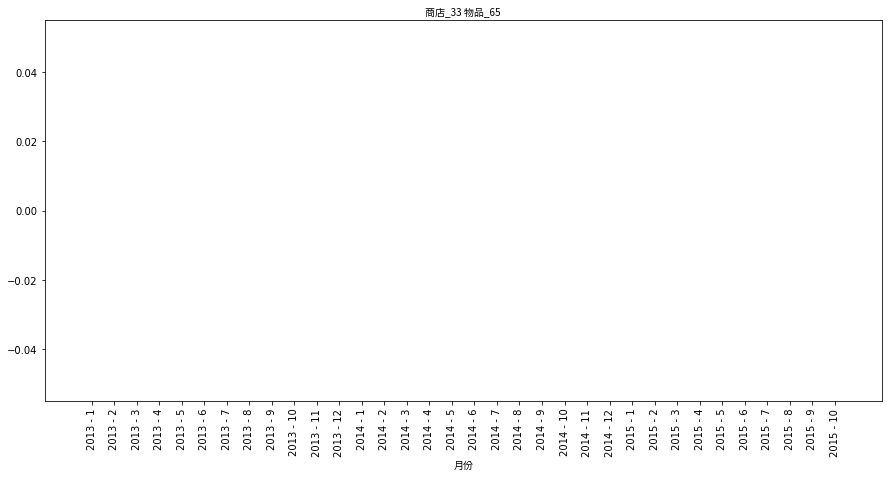

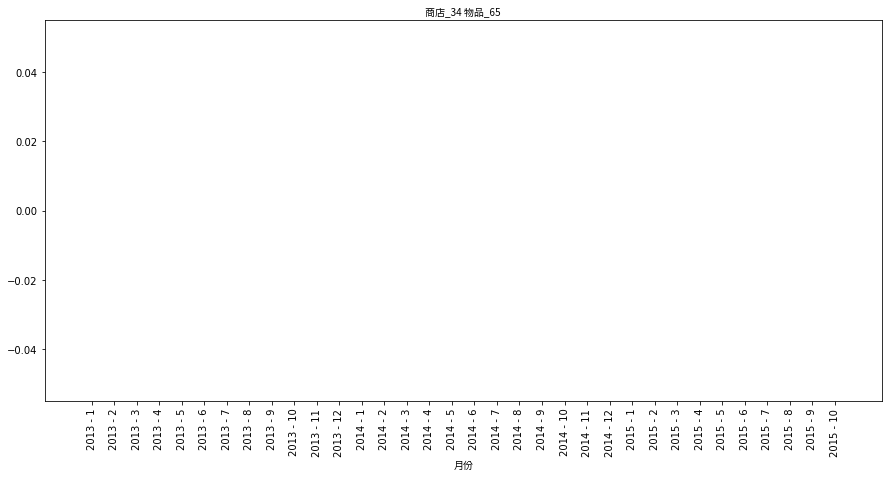

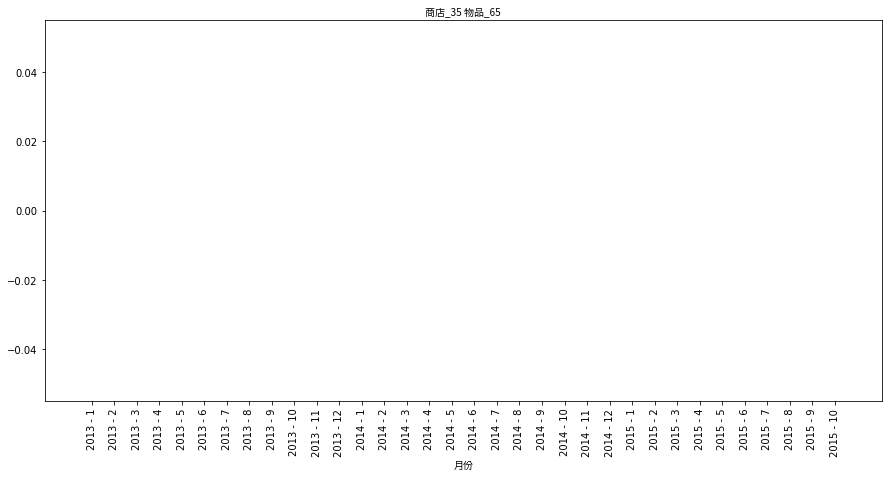

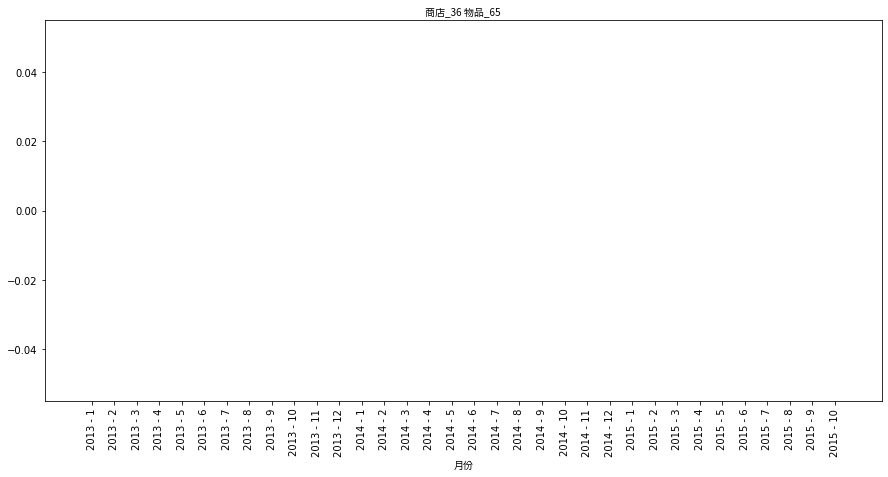

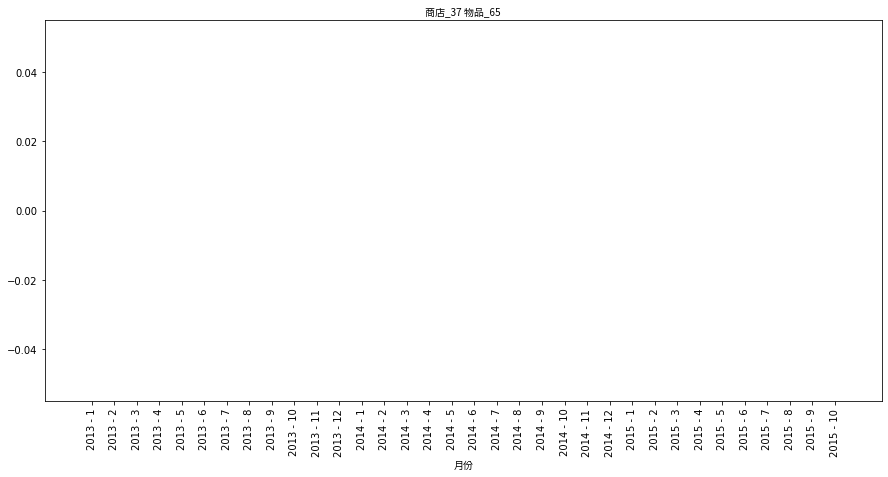

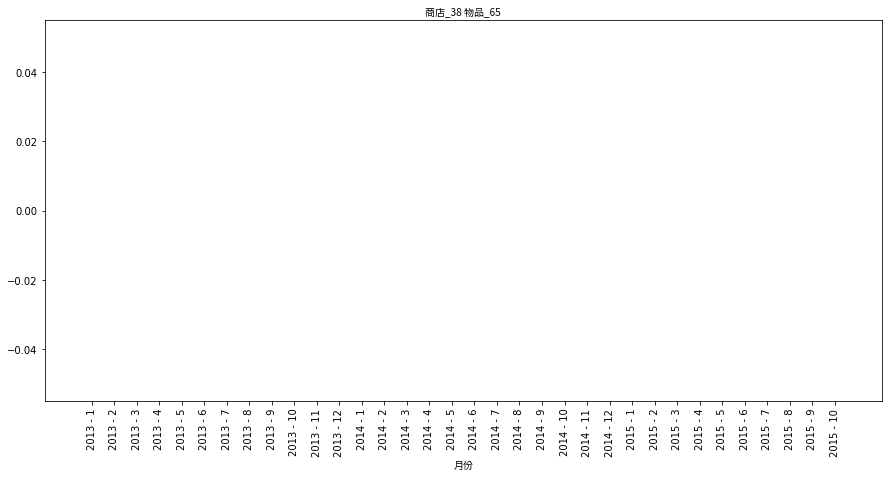

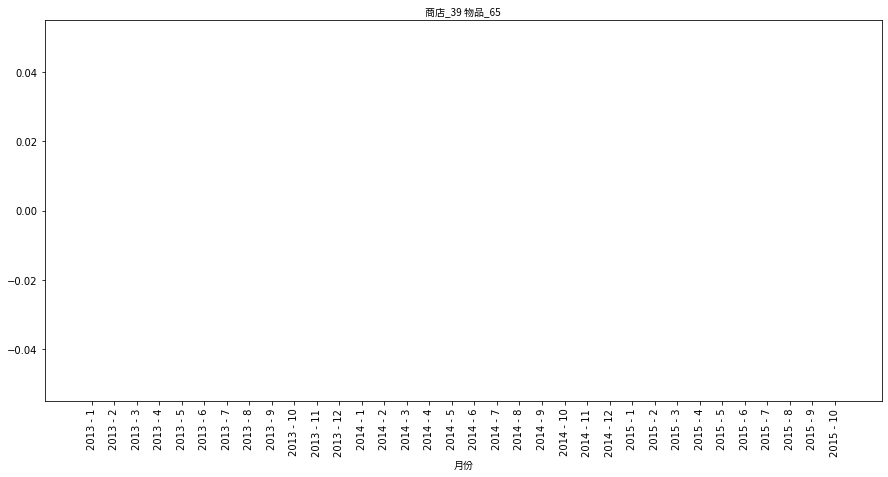

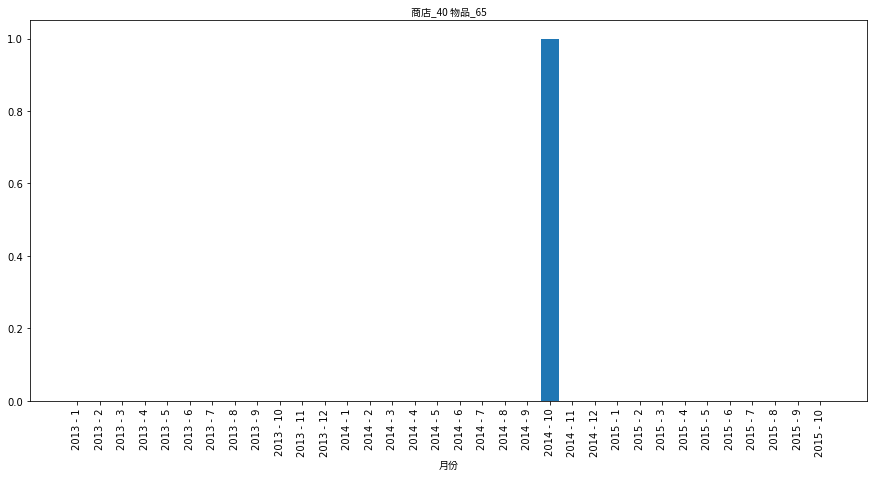

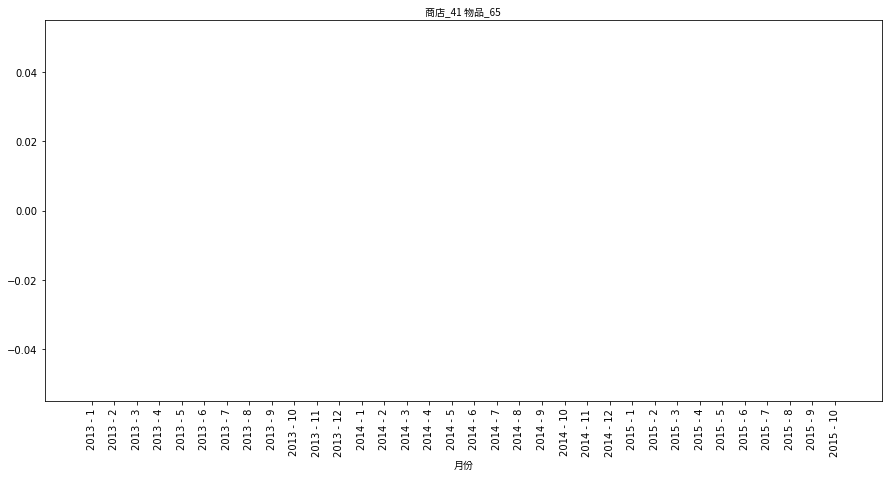

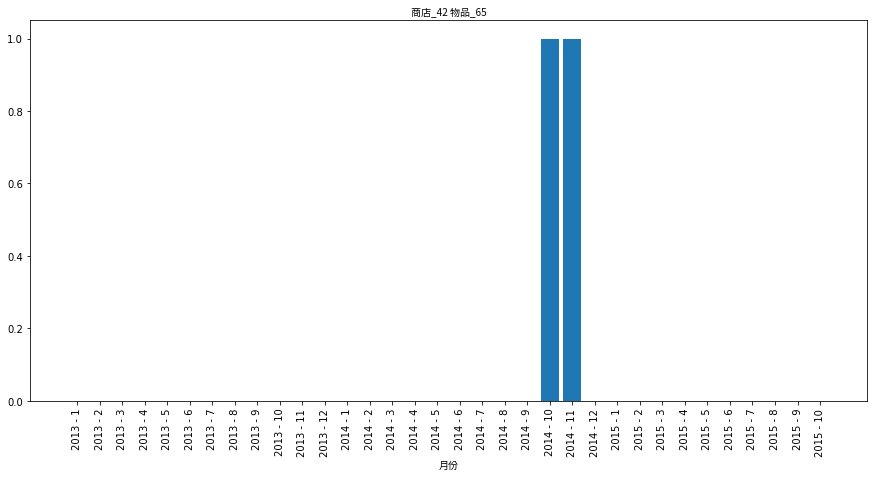

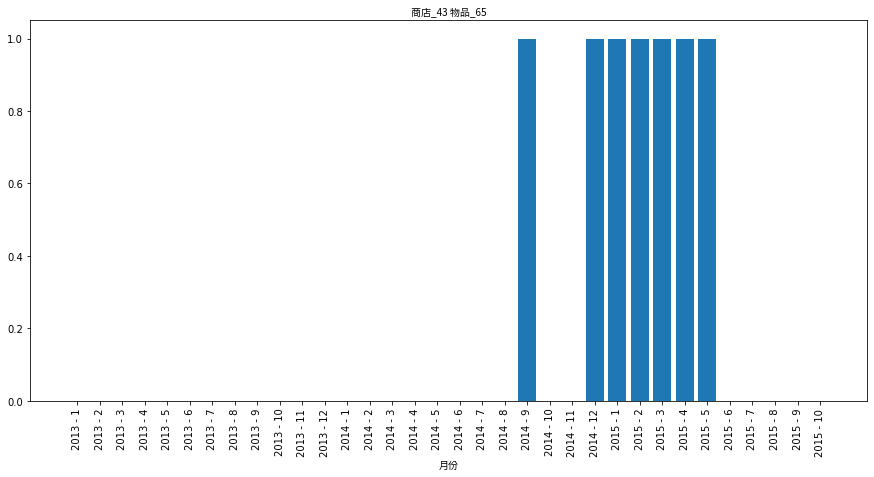

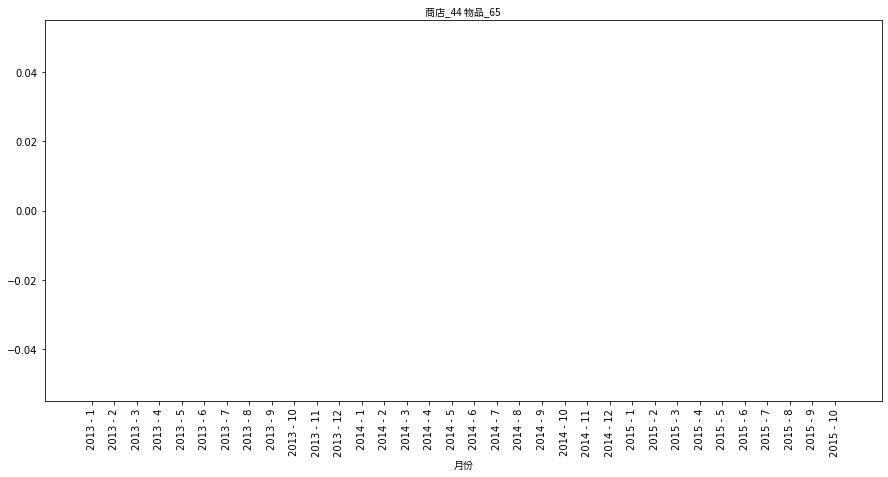

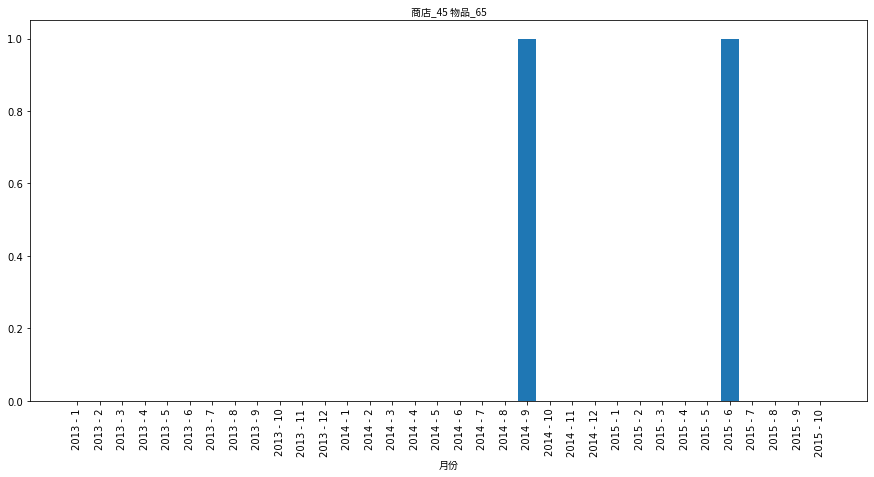

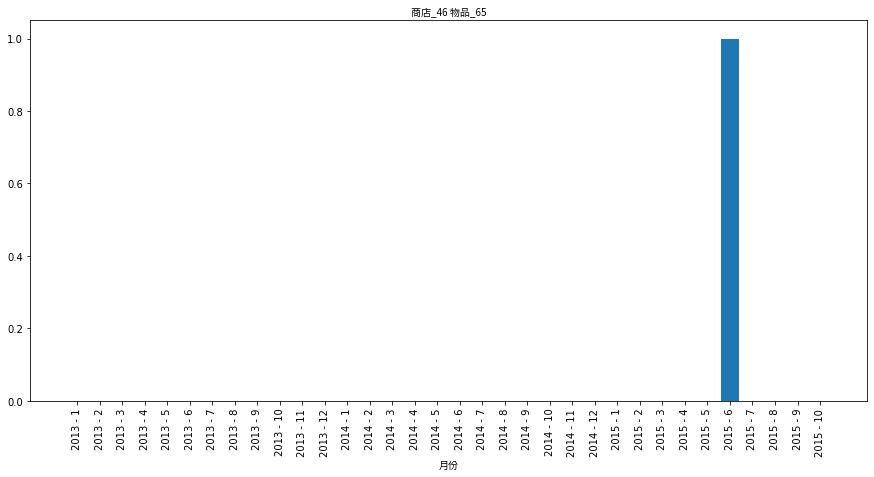

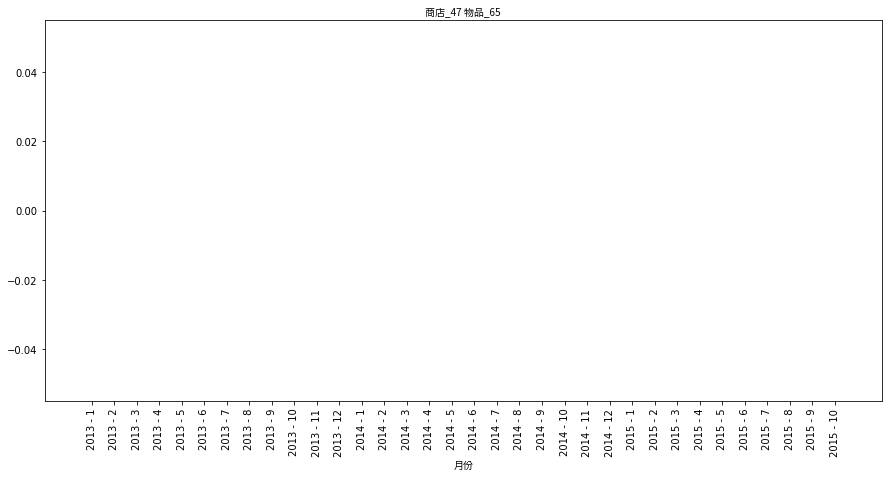

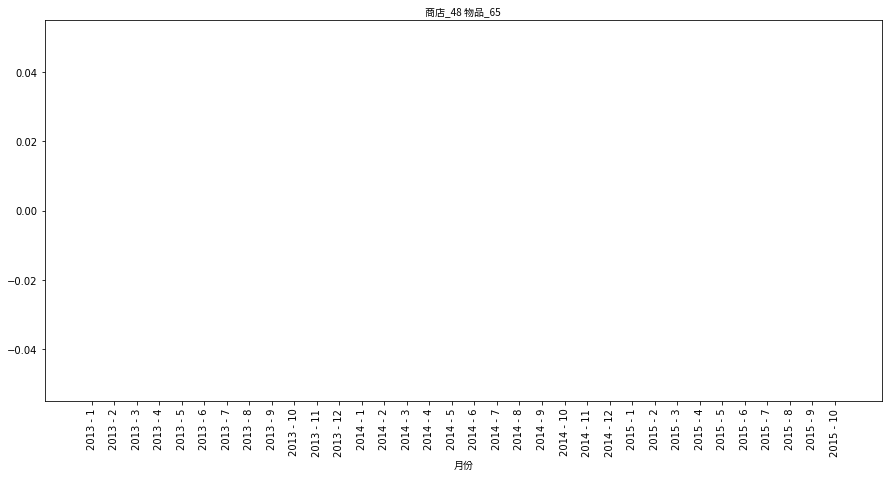

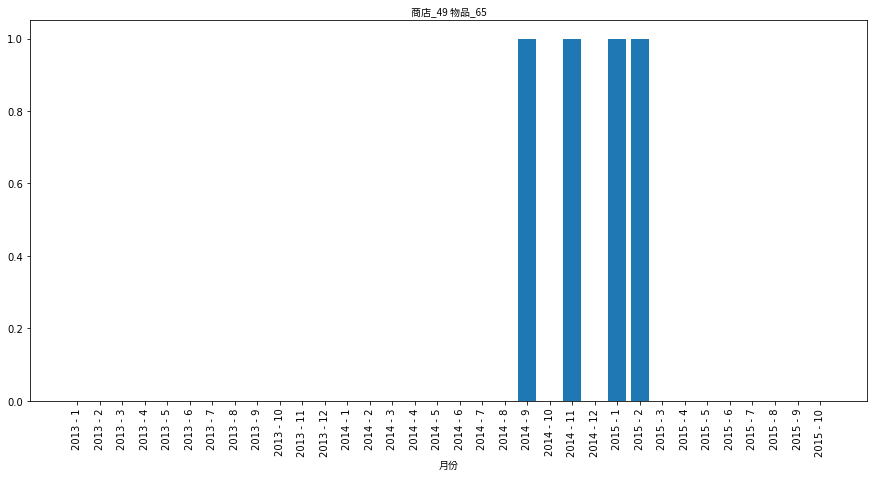

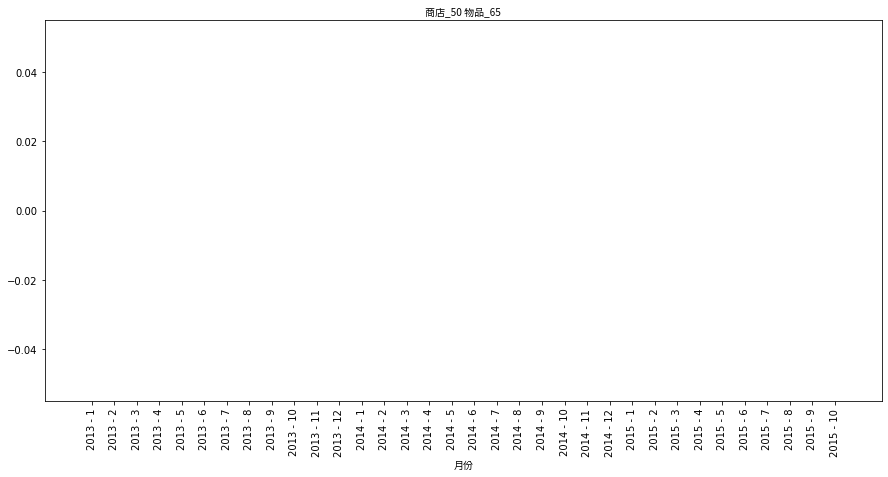

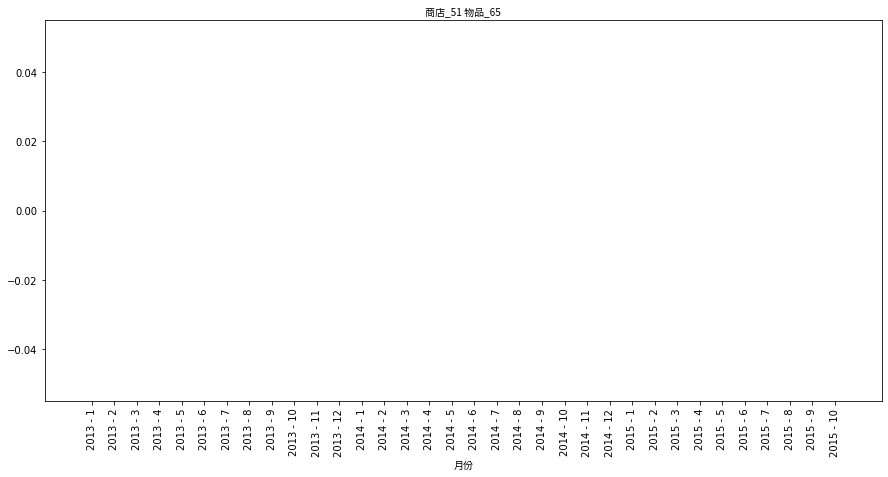

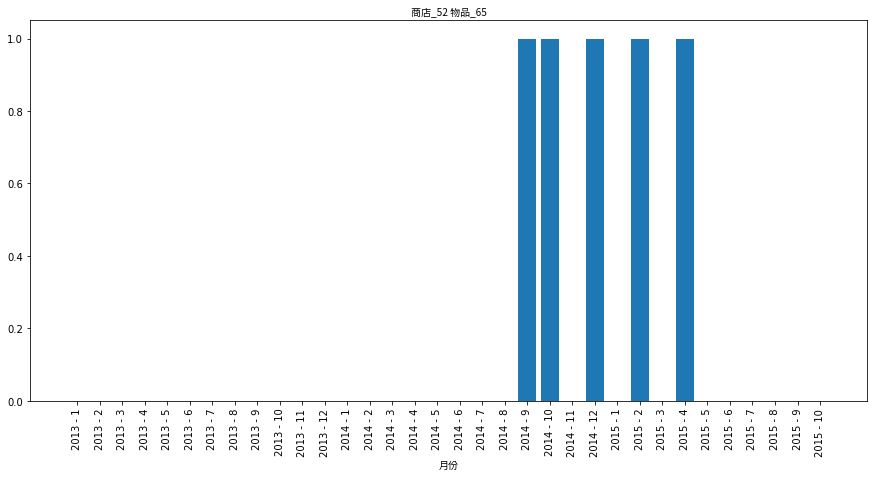

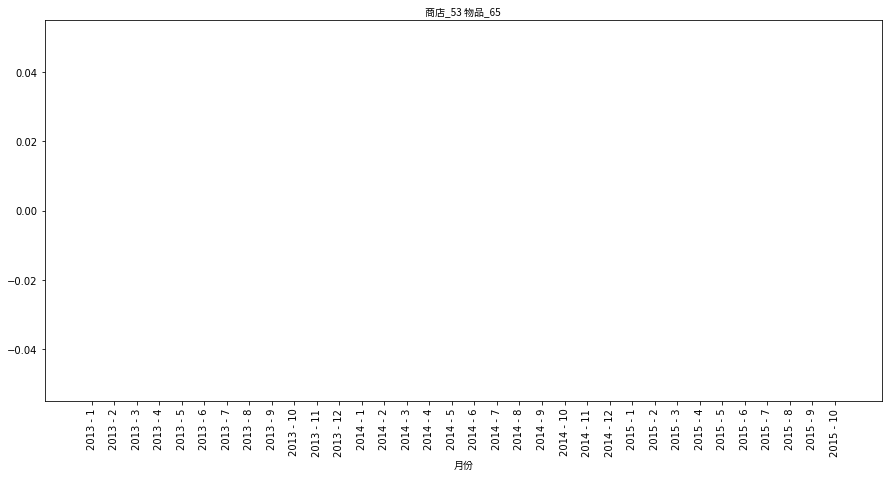

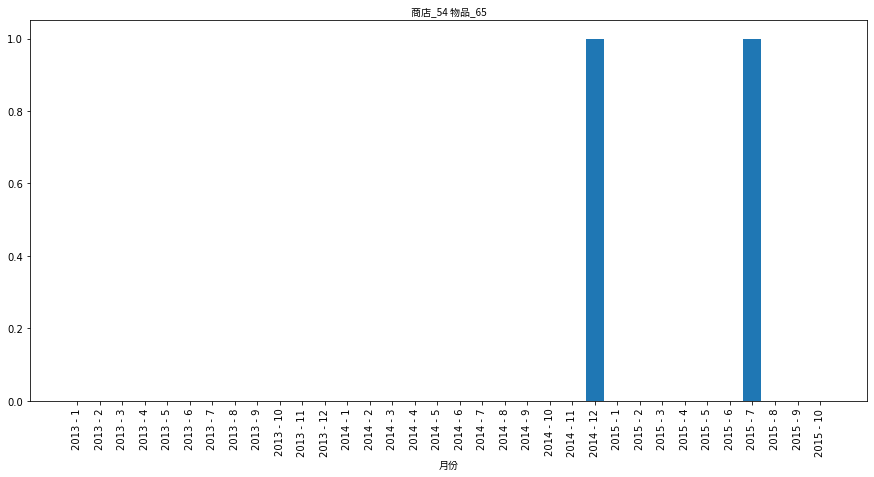

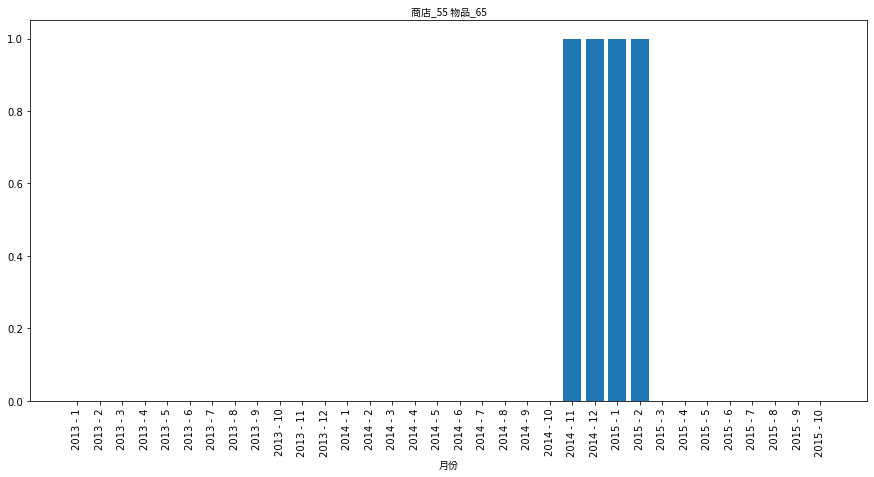

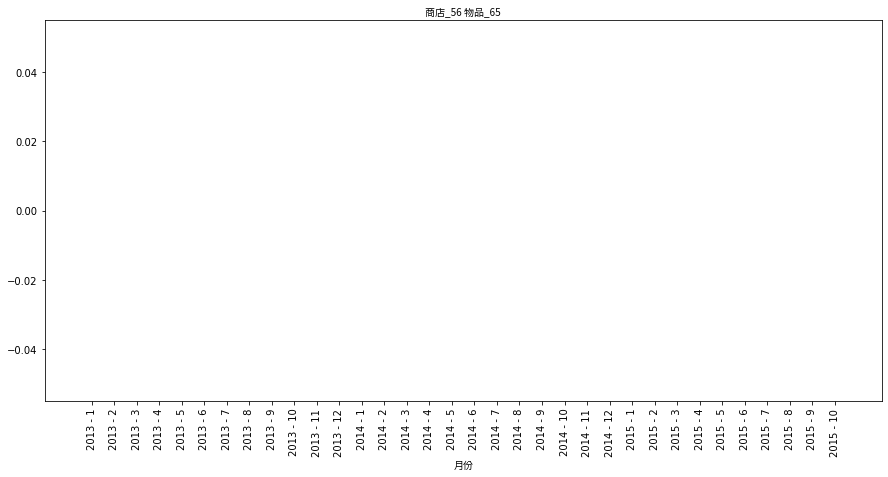

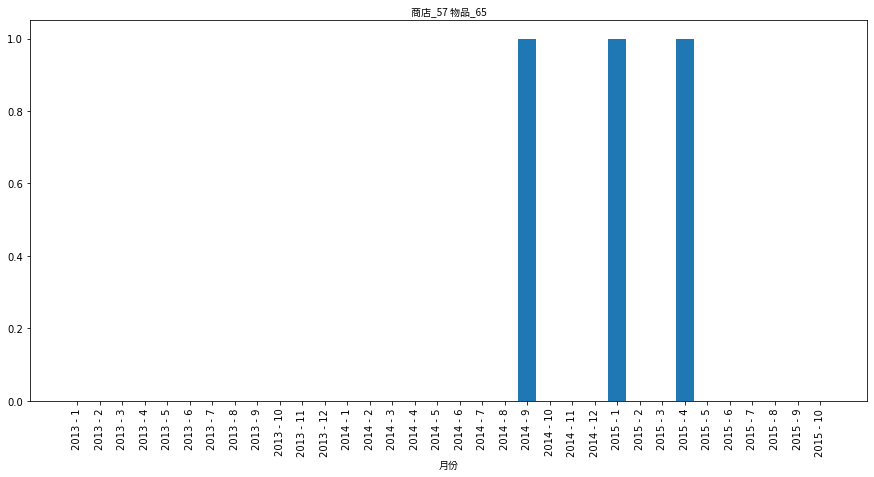

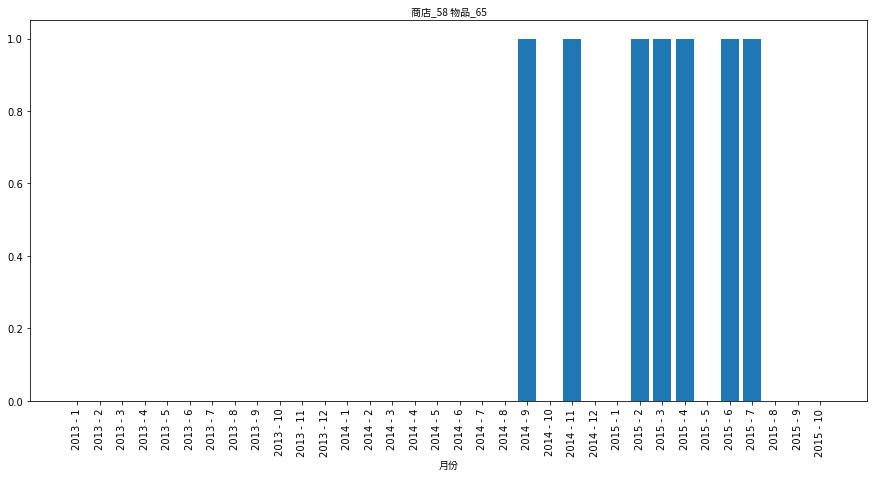

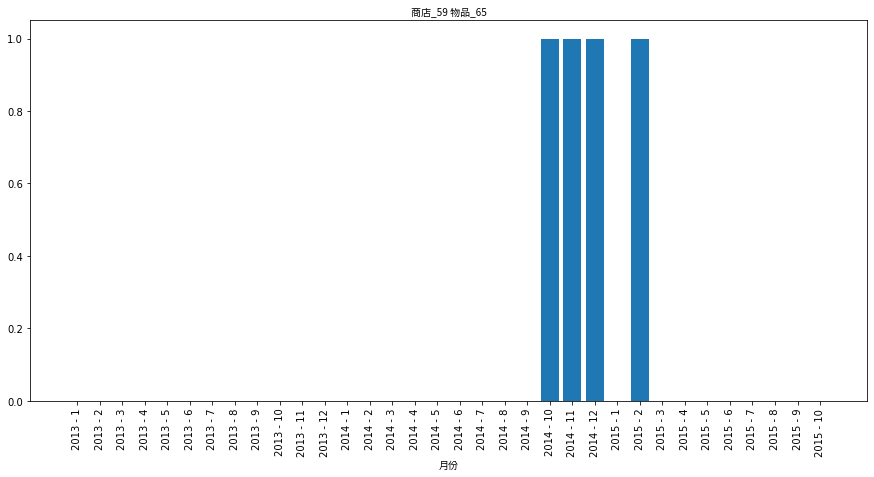

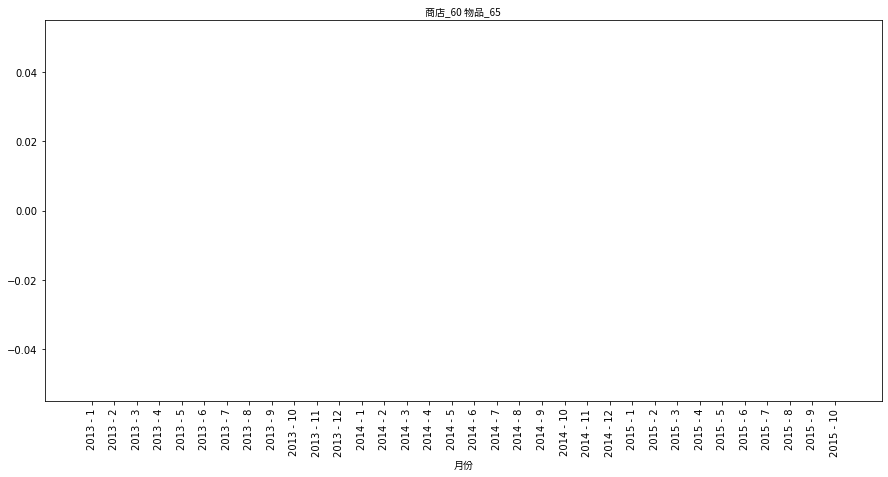

In [ ]:

item = 64
for shop in range(shop_cnt):
    plt.figure(figsize=(15,7))

    plt.bar(range(month_cnt),d[:,shop,item,0])

    dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
    label = [f'{d.year} - {d.month}' for d in dateList]
    plt.xticks(ticks=range(34), labels=label, rotation=90)        
            
    plt.xlabel('月份',fontproperties=myfont) 

    plt.title(f'商店_{shop+1} 物品_{item+1}',fontproperties=myfont)

# 前處理

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import copy

讀取

In [2]:
df = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/sales_train.csv')

In [3]:
df_itemCategory = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/items.csv')

In [4]:
df_id = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/test.csv')

In [5]:
item_cate = {}
for i in df_itemCategory.index:
    item_cate[df_itemCategory['item_id'][i]] = df_itemCategory['item_category_id'][i]
df['item_category_id'] = [item_cate[item_id] for item_id in df['item_id']]

In [6]:
pd.set_option('max_columns', None)
print(df)
print(df.keys())

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3  

In [7]:
month_cnt = np.unique(df['date_block_num']).shape[0]
shop_cnt = np.unique(df['shop_id']).shape[0]
cate_cnt = np.unique(df['item_category_id']).shape[0]
item_cnt = np.unique(df_itemCategory['item_id']).shape[0]

print('month_cnt -> ', month_cnt)
print('shop_cnt -> ', shop_cnt)
print('cate_cnt -> ', cate_cnt)
print('item_cnt -> ', item_cnt)

month_cnt ->  34
shop_cnt ->  60
cate_cnt ->  84
item_cnt ->  22170


In [8]:
item_cate = df_itemCategory['item_category_id'].to_numpy()

In [9]:
def id2month(monthId):
    return np.mod(monthId, 12) + 1

In [10]:
# [month,shop,item,(count)]
d = np.zeros([month_cnt,shop_cnt,item_cnt,1])

In [11]:
shop_id = df['shop_id']
item_id = df['item_id']
month_id = df['date_block_num']
item_id_cnt = df['item_cnt_day']
cate_id = df['item_category_id']

for month in range(month_cnt):
    for shop in range(shop_cnt):        
        select_item_id = item_id[(month_id == month) & (shop_id == shop)]
        select_item_cnt = item_id_cnt[(month_id == month) & (shop_id == shop)]
                
        d[month,shop,select_item_id,0] += select_item_cnt   


# DL 模型

In [12]:
import tensorflow as tf
import tensorflow.keras as keras

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## GRU - shop & item pairs
33 month

**TRAIN_DATA** & **TEST_DATA**

In [ ]:
n_count = len(df_id.index)

In [ ]:
train_x_saleCnt = np.zeros([n_count,month_cnt-2,1])
train_x_shopId = np.zeros([n_count,1])
train_x_itemId = np.zeros([n_count,1])
train_x_cateId = np.zeros([n_count,1])

train_y = np.zeros([n_count,1])

In [ ]:
test_x_saleCnt = np.zeros_like(train_x_saleCnt)
test_x_shopId = np.zeros_like(train_x_shopId)
test_x_itemId = np.zeros_like(train_x_itemId)
test_x_cateId = np.zeros_like(train_x_cateId)

test_y = np.zeros_like(train_y)

In [ ]:
pred_x_saleCnt = np.zeros_like(train_x_saleCnt)
pred_x_shopId = np.zeros_like(train_x_shopId)
pred_x_itemId = np.zeros_like(train_x_itemId)
pred_x_cateId = np.zeros_like(train_x_cateId)

In [ ]:
shops = df_id['shop_id']
items = df_id['item_id']

for index in range(len(df_id.index)):
    shop = shops[index]
    item = items[index]


    cate_ids = d[0,shop,item,1]
    sale_cnts = d[:,shop,item,0].reshape(1,-1,1)
    shop_ids = np.array(shop)
    item_ids = np.array(item)
    

    # train dataSet
    train_x_shopId[index,:] = shop_ids
    train_x_itemId[index,:] = item_ids
    train_x_cateId[index,:] = cate_ids
    train_x_saleCnt[index,:,:] = sale_cnts[:,:-2,:]

    train_y[index,:] = sale_cnts[:,-2]

    # test dataSet
    test_x_shopId[index,:] = shop_ids
    test_x_itemId[index,:] = item_ids
    test_x_cateId[index,:] = cate_ids
    test_x_saleCnt[index,:,:] = sale_cnts[:,1:-1,:]

    test_y[index,:] = sale_cnts[:,-1]

    # pred dataSet
    pred_x_shopId[index,:] = shop_ids
    pred_x_itemId[index,:] = item_ids
    pred_x_cateId[index,:] = cate_ids
    pred_x_saleCnt[index,:,:] = sale_cnts[:,2:,:]

In [ ]:
train_x = (train_x_saleCnt, train_x_cateId, train_x_itemId, train_x_shopId)
test_x = (test_x_saleCnt, test_x_cateId, test_x_itemId, test_x_shopId)
pred_x = (pred_x_saleCnt, pred_x_cateId, pred_x_itemId, pred_x_shopId)

In [ ]:
class p_model(keras.Model):
    def __init__(self):
        super(p_model, self).__init__()
        
        self.emb_cate = keras.layers.Embedding(cate_cnt, 10, input_length=1)
        self.emb_shop = keras.layers.Embedding(shop_cnt, 10, input_length=1)
        self.emb_item = keras.layers.Embedding(item_cnt, 10, input_length=1)

        self.lstm = keras.layers.Bidirectional(keras.layers.GRU(30, activation='tanh'),merge_mode='concat')
        
        self.dense_1 = keras.layers.Dense(100, activation='tanh')
        self.dense_2 = keras.layers.Dense(50, activation='tanh')
        self.dense_3 = keras.layers.Dense(1)
        
    def call(self,x):
        saleCnt, cateId, itemId, shopId = x
        
        cate = tf.squeeze(self.emb_cate(cateId),axis=1)
        shop = tf.squeeze(self.emb_shop(shopId),axis=1)
        item = tf.squeeze(self.emb_item(itemId),axis=1)
        
        seq = self.lstm(saleCnt)        
        
        pred = self.dense_1(tf.concat((cate,shop,item,seq),axis=1))   
        pred = self.dense_2(pred)
        pred = self.dense_3(pred)        

        return pred

model = p_model()

model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.fit(x=train_x, y=train_y, batch_size=2048, epochs=10, verbose=1)

Epoch 1/10
105/105 [==============================] - 11s 14ms/step - loss: 0.1817
Epoch 2/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1654
Epoch 3/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1618
Epoch 4/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1606
Epoch 5/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1592
Epoch 6/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1588
Epoch 7/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1577
Epoch 8/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1573
Epoch 9/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1569
Epoch 10/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1567


In [ ]:
model.evaluate(x=test_x, y=test_y, batch_size=512, verbose=1, return_dict=True)

419/419 [==============================] - 2s 4ms/step - loss: 1.3357


{'loss': 1.335727572441101}

In [ ]:
y_hat = model.predict(pred_x,batch_size=512,verbose=1)

419/419 [==============================] - 2s 3ms/step


In [ ]:
def window_rmse(pred, target):
    n = len(pred)
    wn = 10

    sum = 0
    for i in range(n-wn+1):
        pred_wn = pred[i:i+wn]
        target_wn = target[i:i+wn]
        
        sum += np.power(pred_wn - target_wn,2)
    mean = sum / n
    rmse = np.sqrt(mean)  
    
    return rmse

In [ ]:
def rmse(pred, target):
    return np.sqrt(((pred-target)**2).mean())

In [ ]:
window_rmse(y_hat.flatten(), test_y.flatten())

array([[1.12493024, 1.17395402, 1.17444724, 1.17938663, 1.1779247 ,
        1.17956573, 1.17948321, 1.18049916, 1.18012032, 1.18015608],
       [1.17404488, 1.12492976, 1.17395356, 1.17444673, 1.17938618,
        1.17792653, 1.17956522, 1.17948269, 1.1804987 , 1.18011986],
       [1.17648388, 1.17404488, 1.12492977, 1.17395151, 1.17444673,
        1.17938825, 1.17792448, 1.17956318, 1.1794827 , 1.1804987 ],
       [1.17911474, 1.17648277, 1.17404377, 1.12492971, 1.17395039,
        1.17444695, 1.17938819, 1.17792442, 1.17956207, 1.17948159],
       [1.17871118, 1.1791144 , 1.17648243, 1.17404308, 1.12492935,
        1.17395198, 1.17444627, 1.17938751, 1.17792408, 1.17956173],
       [1.17868927, 1.17871118, 1.1791144 , 1.17648038, 1.17404308,
        1.12493139, 1.17394992, 1.17444421, 1.17938751, 1.17792408],
       [1.18008702, 1.17868884, 1.17871074, 1.17911384, 1.17647994,
        1.1740446 , 1.1249308 , 1.17394936, 1.17444377, 1.17938707],
       [1.18066181, 1.18008623, 1.1786880

In [ ]:
model.fit(x=test_x, y=test_y, batch_size=2048, epochs=10, verbose=0)
output = model.predict(pred_x, batch_size=512, verbose=1)
output = output.flatten()

419/419 [==============================] - 1s 3ms/step


In [ ]:
df_submit = pd.DataFrame(data={'ID':range(len(df_id.index)),'item_cnt_month':output})

In [ ]:
df_submit.to_csv('submit.csv',encoding='utf-8',index=False)

## GRU - shop & item pairs
12 months

**TRAIN_DATA** & **TEST_DATA**

In [14]:
n_count = len(df_id.index)

In [15]:
train_x_saleCnt = list()
train_x_shopId = list()
train_x_itemId = list()
train_x_cateId = list()
train_x_monthId = list()

train_y = list()

In [16]:
test_x_saleCnt = list()
test_x_shopId = list()
test_x_itemId = list()
test_x_cateId = list()
test_x_monthId = list()

test_y = list()

In [17]:
pred_x_saleCnt = list()
pred_x_shopId = list()
pred_x_itemId = list()
pred_x_cateId = list()
pred_x_monthId = list()


In [ ]:
# NORM
d_max = np.max(d)
d_min = np.min(d)

d = (d - d_min)/(d_max - d_min)

In [18]:
shops = df_id['shop_id']
items = df_id['item_id']

for index in range(len(df_id.index)):
    shop = shops[index]
    item = items[index]

    cate_ids = item_cate[item]
    sale_cnts = d[:,shop,item,0].reshape(1,-1,1)
    shop_ids = np.array(shop).reshape(1,-1)
    item_ids = np.array(item).reshape(1,-1)

    for m in range(0,month_cnt -12 +1,1):
        a = sale_cnts[:,m:m+12,:]        

        if m < month_cnt - 12 -1:
            # train dataSet
            train_x_shopId.append(shop_ids)
            train_x_itemId.append(item_ids)
            train_x_cateId.append(cate_ids)
            train_x_monthId.append((id2month(np.arange(m,m+12))-1).reshape(1,-1))
            train_x_saleCnt.append(a)
            
            
            target = sale_cnts[:,m+12,:].reshape(1,-1)
            train_y.append(target)
        elif m < month_cnt -12:
            # test dataSet
            test_x_shopId.append(shop_ids)
            test_x_itemId.append(item_ids)
            test_x_cateId.append(cate_ids)
            test_x_monthId.append((id2month(np.arange(m,m+12))-1).reshape(1,-1))
            test_x_saleCnt.append(a)
            
            target = sale_cnts[:,m+12,:].reshape(1,-1)
            test_y.append(target)
        elif m < month_cnt -12 +1:
            # pred dataSet
            pred_x_shopId.append(shop_ids)
            pred_x_itemId.append(item_ids)
            pred_x_cateId.append(cate_ids)
            pred_x_monthId.append((id2month(np.arange(m,m+12))-1).reshape(1,-1))
            pred_x_saleCnt.append(a)            
            

In [19]:
train_x_shopId = np.vstack(train_x_shopId)
train_x_itemId = np.vstack(train_x_itemId)
train_x_cateId = np.vstack(train_x_cateId)
train_x_monthId = np.vstack(train_x_monthId)
train_x_saleCnt = np.vstack(train_x_saleCnt)
train_y = np.vstack(train_y)

test_x_shopId = np.vstack(test_x_shopId)
test_x_itemId = np.vstack(test_x_itemId)
test_x_cateId = np.vstack(test_x_cateId)
test_x_monthId = np.vstack(test_x_monthId)
test_x_saleCnt = np.vstack(test_x_saleCnt)
test_y = np.vstack(test_y)

pred_x_shopId = np.vstack(pred_x_shopId)
pred_x_itemId = np.vstack(pred_x_itemId)
pred_x_cateId = np.vstack(pred_x_cateId)
pred_x_monthId = np.vstack(pred_x_monthId)
pred_x_saleCnt = np.vstack(pred_x_saleCnt)

In [20]:
train_x = (train_x_saleCnt, train_x_cateId, train_x_itemId, train_x_shopId, train_x_monthId)
test_x = (test_x_saleCnt, test_x_cateId, test_x_itemId, test_x_shopId, test_x_monthId)
pred_x = (pred_x_saleCnt, pred_x_cateId, pred_x_itemId, pred_x_shopId, pred_x_monthId)

In [21]:
class p_model(keras.Model):
    def __init__(self):
        super(p_model, self).__init__()
        
        self.emb_cate = keras.layers.Embedding(cate_cnt, 10, input_length=1)
        self.emb_shop = keras.layers.Embedding(shop_cnt, 10, input_length=1)
        self.emb_item = keras.layers.Embedding(item_cnt, 10, input_length=1)
        self.emb_month = keras.layers.Embedding(12, 10, input_length=12)

        self.lstm = keras.layers.Bidirectional(keras.layers.LSTM(30, activation='tanh'),merge_mode='concat')
        
        self.dense_1 = keras.layers.Dense(256, activation='tanh')
        self.dense_2 = keras.layers.Dense(128, activation='tanh')
        self.dense_3 = keras.layers.Dense(50, activation='tanh')
        self.dense_4 = keras.layers.Dense(1)
        
    def call(self, x):
        saleCnt, cateId, itemId, shopId, monthId = x
        
        cate = tf.squeeze(self.emb_cate(cateId),axis=1)
        shop = tf.squeeze(self.emb_shop(shopId),axis=1)
        item = tf.squeeze(self.emb_item(itemId),axis=1)

        month = self.emb_month(monthId)
        
        seqFeatures = tf.concat((saleCnt,month),axis=2)
        
        seq = self.lstm(seqFeatures)        
        
        pred = self.dense_1(tf.concat((cate,shop,item,seq),axis=1))   
        pred = self.dense_2(pred)
        pred = self.dense_3(pred)  
        pred = self.dense_4(pred)      

        return pred

model = p_model()

model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError())

In [22]:
model.fit(x=train_x, y=train_y, batch_size=1024, epochs=10, verbose=1)

Epoch 1/10
4393/4393 [==============================] - 84s 17ms/step - loss: 0.6023
Epoch 2/10
4393/4393 [==============================] - 73s 17ms/step - loss: 0.5998
Epoch 3/10
4393/4393 [==============================] - 73s 17ms/step - loss: 0.5992
Epoch 4/10
4393/4393 [==============================] - 73s 17ms/step - loss: 0.5974
Epoch 5/10
4393/4393 [==============================] - 72s 16ms/step - loss: 0.5935
Epoch 6/10
4393/4393 [==============================] - 72s 16ms/step - loss: 0.5893
Epoch 7/10
4393/4393 [==============================] - 72s 16ms/step - loss: 0.5820
Epoch 8/10
4393/4393 [==============================] - 72s 16ms/step - loss: 0.5836
Epoch 9/10
4393/4393 [==============================] - 72s 16ms/step - loss: 0.5795
Epoch 10/10
4393/4393 [==============================] - 72s 16ms/step - loss: 0.5802


In [23]:
model.evaluate(x=test_x, y=test_y, batch_size=512, verbose=1, return_dict=True)

419/419 [==============================] - 3s 5ms/step - loss: 1.2669


{'loss': 1.2668919563293457}

In [24]:
y_hat = model.predict(test_x,batch_size=512,verbose=1)

419/419 [==============================] - 2s 3ms/step


In [25]:
def window_rmse(pred, target):
    n = len(pred)
    wn = 10

    sum = 0
    for i in range(n-wn+1):
        pred_wn = pred[i:i+wn]
        target_wn = target[i:i+wn]
        
        sum += np.sum(np.power(pred_wn - target_wn,2))
    mean = sum / n
    rmse = np.sqrt(mean)  
    
    return rmse

In [ ]:
def rmse(pred, target): 
    return np.sqrt(((pred-target)**2).mean())

In [26]:
window_rmse(y_hat.flatten() , test_y.flatten())

3.5593363396693984

In [28]:
DL_GRU_yHat = y_hat.flatten()

In [29]:
model.fit(x=test_x, y=test_y, batch_size=2048, epochs=10, verbose=0)
output = model.predict(pred_x, batch_size=512, verbose=1)
output = output.flatten()

419/419 [==============================] - 1s 3ms/step


In [ ]:
output = output * (d_max - d_min) + d_min

In [30]:
df_submit = pd.DataFrame(data={'ID':range(len(df_id.index)),'item_cnt_month':output})

In [31]:
df_submit.to_csv('submit.csv',encoding='utf-8',index=False)

# ML model

## Light GBM
[lightGBM docs](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html) \
[lightGBM github(Microsoft)](https://github.com/Microsoft/LightGBM/)

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# DATA
n_count = len(df_id.index)
train_x = np.zeros([n_count,month_cnt-2 + 3])
train_y = np.zeros([n_count,1])

test_x = np.zeros([n_count,month_cnt-2 + 3])
test_y = np.zeros([n_count,1])

pred_x = np.zeros([n_count,month_cnt-2 + 3])

shops = df_id['shop_id']
items = df_id['item_id']

for index in range(n_count):
    shop_id = shops[index]
    item_id = items[index]
    cate_id = item_cate[item]

    train_x[index,:-3] = d[:-2,shop_id,item_id,0]
    train_x[index,-3:] = np.array([shop_id,item_id,cate_id])
    train_y[index,0] = d[-2,shop_id,item_id,0]

    test_x[index,:-3] = d[1:-1,shop_id,item_id,0]
    test_x[index,-3:] = np.array([shop_id,item_id,cate_id])
    test_y[index,0] = d[-1,shop_id,item_id,0]

    pred_x[index,:-3] = d[2:,shop_id,item_id,0]
    pred_x[index,-3:] = np.array([shop_id,item_id,cate_id])

train_data = lgb.Dataset(train_x, label=train_y.flatten())


In [ ]:
# PARAM

param = {'num_leaves': 100, 'objective': 'regression'}

In [ ]:
# TRAIN

num_round = 1000
bst = lgb.train(param, train_data, num_round)

In [ ]:
# PREDICT

ypred = bst.predict(test_x)

In [ ]:
def window_rmse(pred, target):
    n = len(pred)
    wn = 10

    sum = 0
    for i in range(n-wn+1):
        pred_wn = pred[i:i+wn]
        target_wn = target[i:i+wn]
        
        sum += np.sum(np.power(pred_wn - target_wn,2))
    mean = sum / n
    rmse = np.sqrt(mean)  
    
    return rmse

In [ ]:
window_rmse(ypred,test_y.flatten())

3.6709130965532277

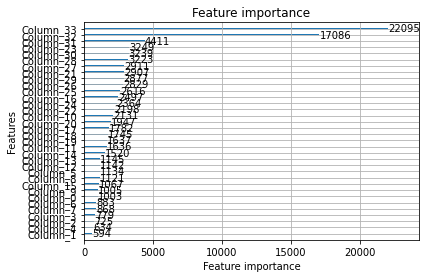

In [ ]:
lgb.plot_importance(bst)

**predict**

In [ ]:
train_data = lgb.Dataset(np.concatenate((train_x,test_x),axis=0), label=np.concatenate((train_y,test_y),axis=0).flatten())

In [ ]:
num_round = 1000
bst = lgb.train(param, train_data, num_round)
output = bst.predict(pred_x)

In [ ]:
df_submit = pd.DataFrame(data={'ID':range(len(df_id.index)),'item_cnt_month':output})
df_submit.to_csv('submit.csv',encoding='utf-8',index=False)

# 比較圖

In [ ]:
print(window_rmse(DL_GRU_yHat,test_y.flatten()))
print(window_rmse(ypred,test_y.flatten()))

3.635103050245737
3.6753633626353626


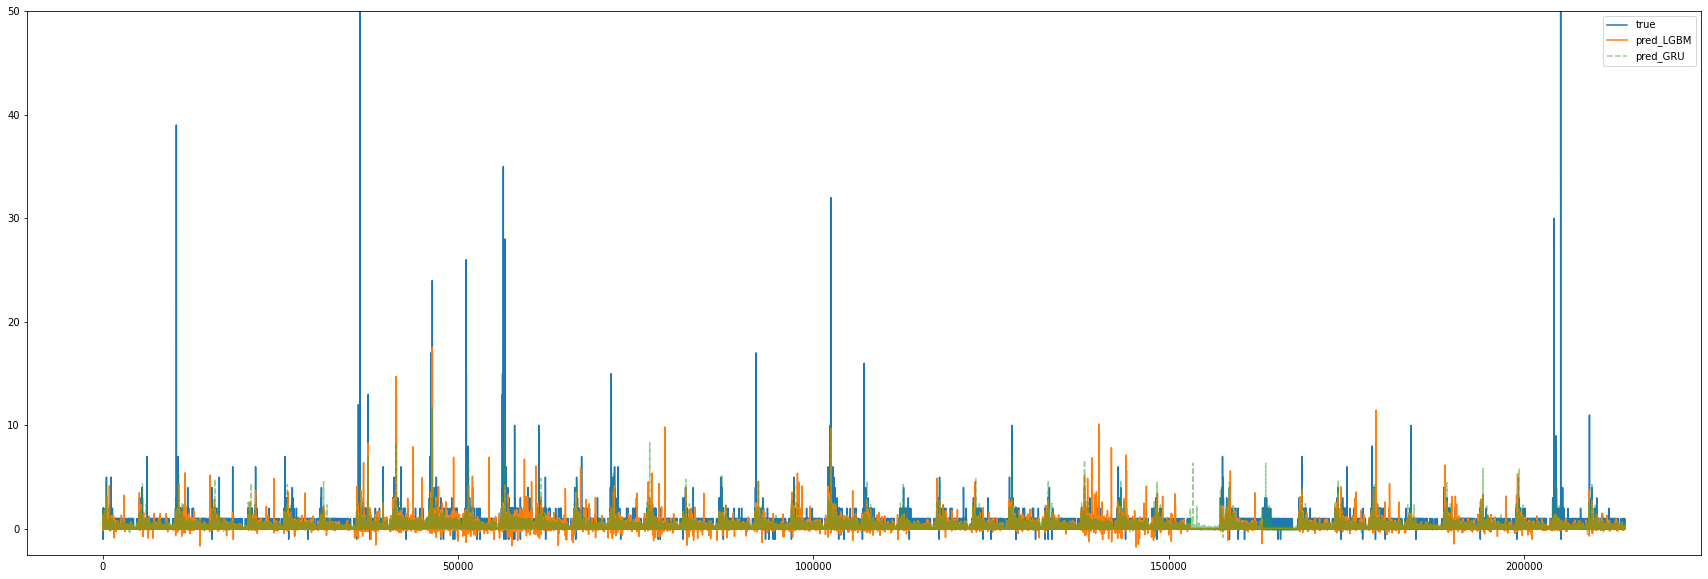

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(test_y.flatten(),label='true')
plt.plot(ypred, label='pred_LGBM')
plt.plot(DL_GRU_yHat,'--',alpha=0.5, label='pred_GRU')

plt.ylim([-2.5,50])
plt.legend(loc=1)